In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.linalg import expm
import scipy.linalg as spl
import sympy as sp

In [2]:
A = np.array([
    [0, 0,         1,             0],
    [0, 0,         0,             1],
    [0, 0.060985, -7.4894,  -0.0875],
    [0, 1.08167, -0.82153, -1.55195]
])
B= np.array([
    [0],
    [0],
    [0.98343],
    [0.10787]
])

In [3]:
def discrete_system_coef(h):
    """ Функция пересчета матриц A и B для дискретной системы
    
    Принимает только параметры класса \\
    На выход подаются A и B
    """
    Ad = spl.expm(A * h)

    n_factorial, T = 1, 1

    Bd = np.zeros(A.shape)
    var = np.identity(A.shape[0])
    for n in range(1, 20):
        n_factorial = n_factorial * n
        T = T * h
        Bd = Bd + var * (T / n_factorial)
        var = var @ A
    Bd = Bd @ B
    return Ad, Bd

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Собственные числа:", eigenvalues)
print("Собственные векторы:\n", eigenvectors)

Собственные числа: [ 0.          0.52103246 -2.05945329 -7.50292918]
Собственные векторы:
 [[ 1.          0.00327109 -0.00941855  0.13081038]
 [ 0.          0.88683569  0.4366943   0.01850665]
 [ 0.          0.00170434  0.01939707 -0.981461  ]
 [ 0.          0.46207018 -0.89935151 -0.13885408]]


In [7]:
A_transposed = A.T

print("Транспонированная матрица A:\n", A_transposed)

Транспонированная матрица A:
 [[ 0.        0.        0.        0.      ]
 [ 0.        0.        0.060985  1.08167 ]
 [ 1.        0.       -7.4894   -0.82153 ]
 [ 0.        1.       -0.0875   -1.55195 ]]


In [5]:
eigenvalues, eigenvectors = np.linalg.eig(A_transposed)

print("Собственные числа:", eigenvalues)
print("Собственные векторы:\n", eigenvectors)

Собственные числа: [ 0.52103246 -2.05945329 -7.50292918  0.        ]
Собственные векторы:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  9.91067090e-01]
 [ 8.99040872e-01 -4.57767272e-01 -1.05003266e-02  5.59178436e-08]
 [-4.46719983e-02 -1.32999572e-01  9.99809303e-01  1.33152788e-01]
 [ 4.35579985e-01  8.79067823e-01  1.64651291e-02 -7.50720899e-03]]


Система не является устойчивой. Хотим передвинуть собственные значения для достижения устойчивости.

## 5

### 5 a

In [6]:
S_ = np.array([
    [0, 8.99040872e-01, -4.46719983e-02, 4.35579985e-01],
    [1,     0,      0,     0],
    [0,     0,      1,     0],
    [0,     0,      0,     1]
]) 
S = np.linalg.inv(S_)

print("S:\n", S) 

S:
 [[ 0.          1.          0.          0.        ]
 [ 1.11229648  0.          0.04968851 -0.48449409]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [7]:
A_1 = S_ @ A @ S
B_1 = S_ @ B
print("A^: ", A_1)
print("B^: ", B_1)

A^:  [[ 5.21032464e-01  0.00000000e+00  3.26277956e-10  1.38163606e-09]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 6.78334010e-02  0.00000000e+00 -7.48636975e+00 -1.17046872e-01]
 [ 1.20313774e+00  0.00000000e+00 -7.67783433e-01 -2.07601272e+00]]
B^:  [[0.00305423]
 [0.        ]
 [0.98343   ]
 [0.10787   ]]


In [8]:
theta_1 = (-1 - 5.21032464e-01) / 0.00305423
print("theta^_1 = ", theta_1)

theta^_1 =  -498.0084879003874


In [9]:
theta_ = np.array([
    [theta_1, 0, 0, 0],
])
theta = theta_ @ S_
print("theta = ", theta)


theta =  [[   0.         -447.72998523   22.24703432 -216.92252969]]


In [10]:
Ac = A + B @ theta
print(Ac)

[[   0.            0.            1.            0.        ]
 [   0.            0.            0.            1.        ]
 [   0.         -440.25011437   14.38900097 -213.41562337]
 [   0.          -47.21496351    1.57825759  -24.95138328]]


In [11]:
eigenvalues, eigenvectors = np.linalg.eig(Ac)

print("Собственные числа:", eigenvalues)

Собственные числа: [ 0.         -7.50292914 -2.05945331 -0.99999987]


Для линейной системы


In [12]:
def model(x, t, A, B, theta):
    u = np.dot(theta, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 20, 1000)  # Временной интервал 0-8 секунд
x0 = [0, np.pi/8, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, theta))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [13]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + -440.25011437 * y2 + 14.38900097 * y3 + -213.41562337 * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + -440.25011437 * y2 + 14.38900097 * y3 + -213.41562337 * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) + -47.21496351 * y2 + 1.57825759 * y3 + -24.95138328 * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

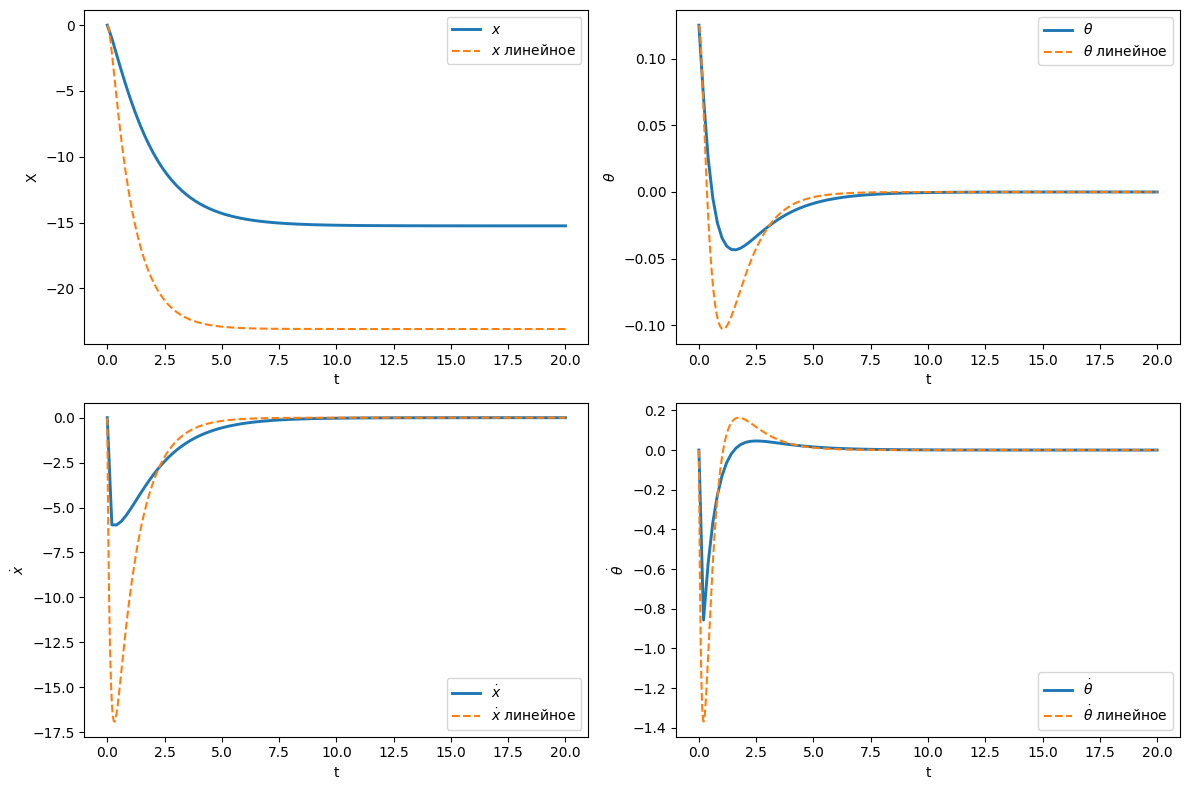

In [14]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

По графикам видно, что при стабилизации маятника происходит постепенное смещение колеса от начального положения. Происходит это из-за отсутствия у системы асимптотической устойсивости, так как собственное число λ4 = 0 не сдвигалось в левую полуплоскость.

### 5 б

Теперь будем двигать не только положительное с.ч., но и с.ч. равное 0. Отсутствие собственного значения 0 должно привести к тому, что все переменные будут стремиться к нулю, а не к каким-то другим постоянным значениям. Предполагается, что система будет стремиться к состоянию равновесия асимптотически

#### Двигаем 2 с.ч. в -1

Рассмотрим сдвиг собственных чисел 0 и 0.521 в -1

In [49]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-1, -2.05945329, -7.50292918, -1]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[   14.61634116 -1307.0431266     66.90876963  -633.36538228]]


In [50]:
Ac = A + B @ K
print(Ac)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.43741484e+01 -1.28532444e+03  5.83106913e+01 -6.22958018e+02]
 [ 1.57666472e+00 -1.39909072e+02  6.39591898e+00 -6.98730738e+01]]


In [51]:
eigenvalues, eigenvectors = np.linalg.eig(Ac)

print("Собственные числа:", eigenvalues)

Собственные числа: [-7.50292918 -2.05945329 -0.99999986 -1.00000014]


Для линейной системы

In [52]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 20, 1000)  # Временной интервал 0-8 секунд
x0 = [0, np.pi/8, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [53]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

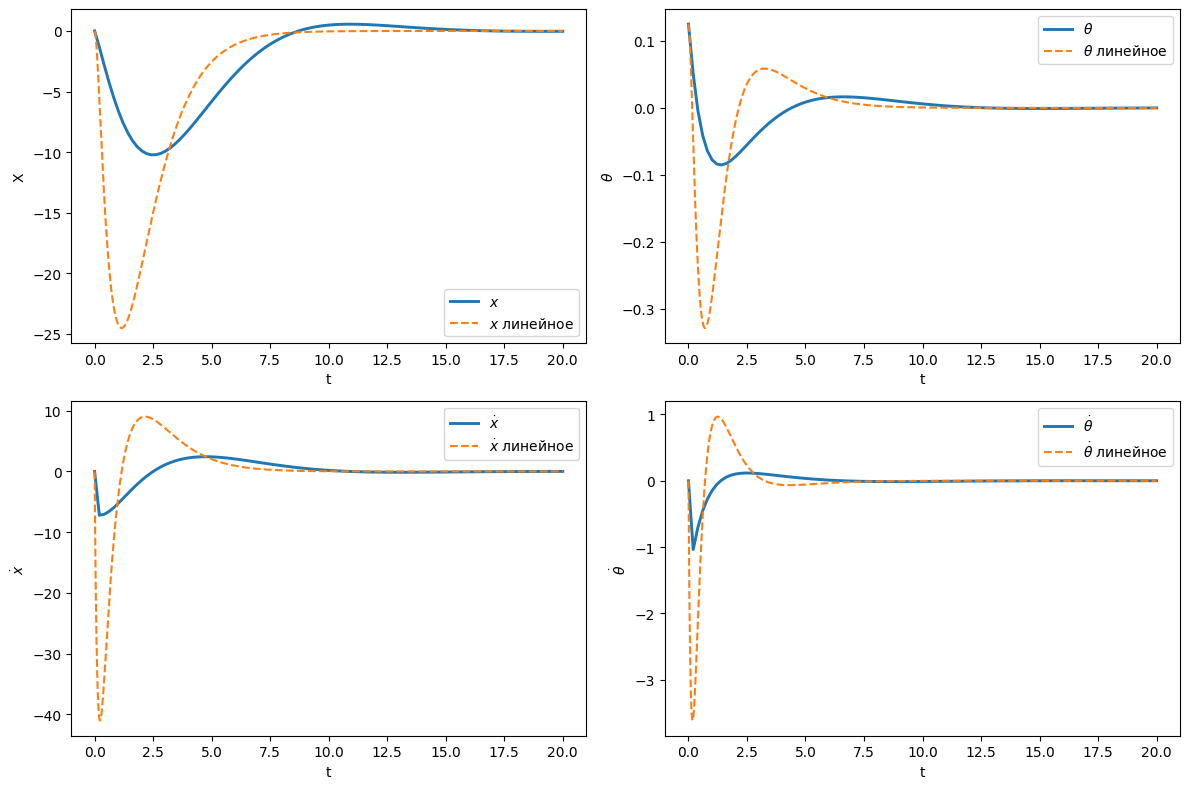

In [54]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

 Судя по полученным графикам при использовании полученного регулятора система действительно стабилизируется вертикальном положении.

#### Двигаем 2 с.ч. в -1/2

Рассмотрим сдвиг собственных чисел 0 и 0.521 в -1/2

Мы ожидаем, что переходные процессы (возвращение к нулю) будут происходить медленнее, чем в предыдущем случае. Следовательно, время, необходимое для достижения устойчивого состояния, увеличится.

In [156]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-0.5, -2.05945329, -7.50292918, -0.5]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[   3.65408529 -588.96847917   29.75590131 -285.37942428]]


In [157]:
Ac = A + B @ K
print(Ac)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 3.59353710e+00 -5.79148286e+02  2.17734460e+01 -2.80738187e+02]
 [ 3.94166180e-01 -6.24503598e+01  2.38823907e+00 -3.23358285e+01]]


Для линейной системы

In [158]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 20, 1000)  # Временной интервал 0-8 секунд
x0 = [0, np.pi/8, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [159]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

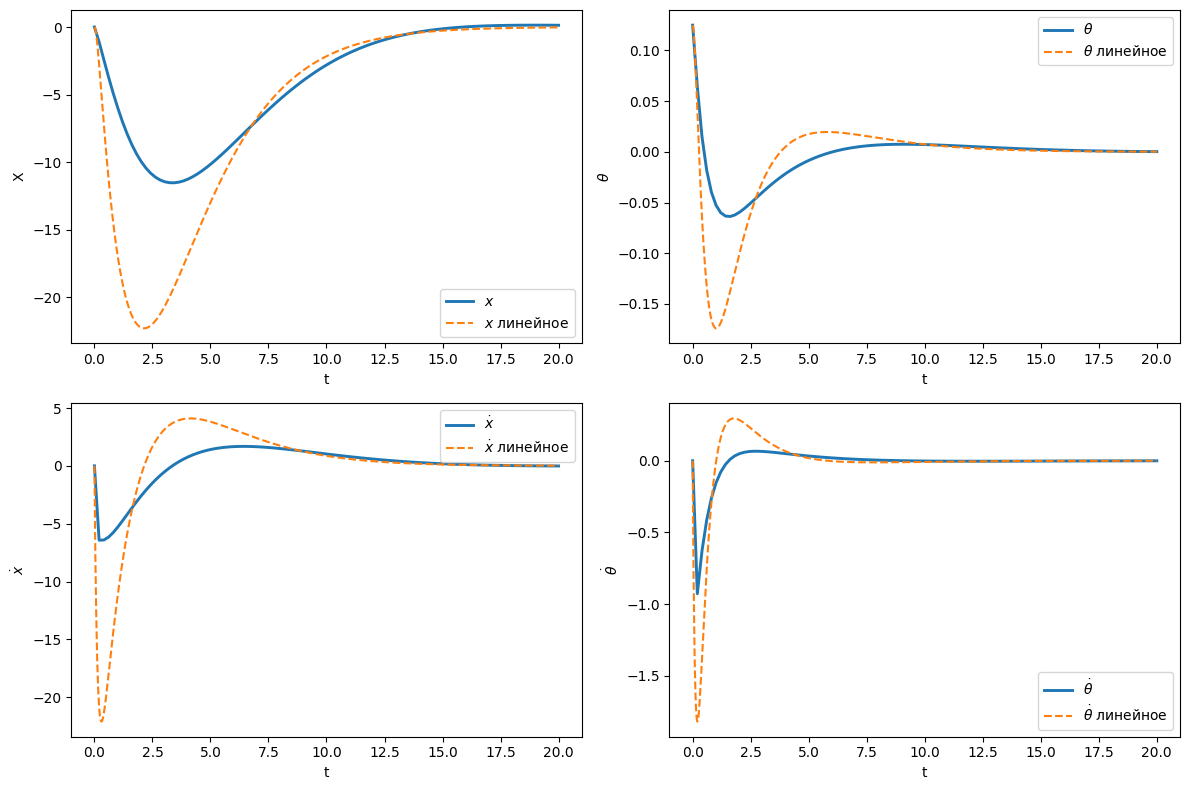

In [160]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

Уменьшение абсолютной величины собственных значений с -1 до -1/2 действительно привело к замедлению затухания, как и ожидалось.

#### Двигаем 2 с.ч. в -10

Рассмотрим сдвиг собственных чисел 0 и 0.521 в -10

Мы ожидаем, что возвращение к нулю будет происходить быстрее, чем в предыдущих случаях. Следовательно, время, необходимое для достижения устойчивого состояния, уменьшится.

In [34]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-10, -2.05945329, -7.50292918, -10]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[  1461.63411568 -62535.93845169   3303.69225087 -30309.36407471]]


In [35]:
Ac = A + B @ K
print(Ac)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.43741484e+03 -6.14996570e+04  3.24146067e+03 -2.98072254e+04]
 [ 1.57666472e+02 -6.74467001e+03  3.55547753e+02 -3.27102305e+03]]


Для линейной системы

In [36]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 20, 1000)  # Временной интервал 0-8 секунд
x0 = [0, np.pi/8, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [40]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

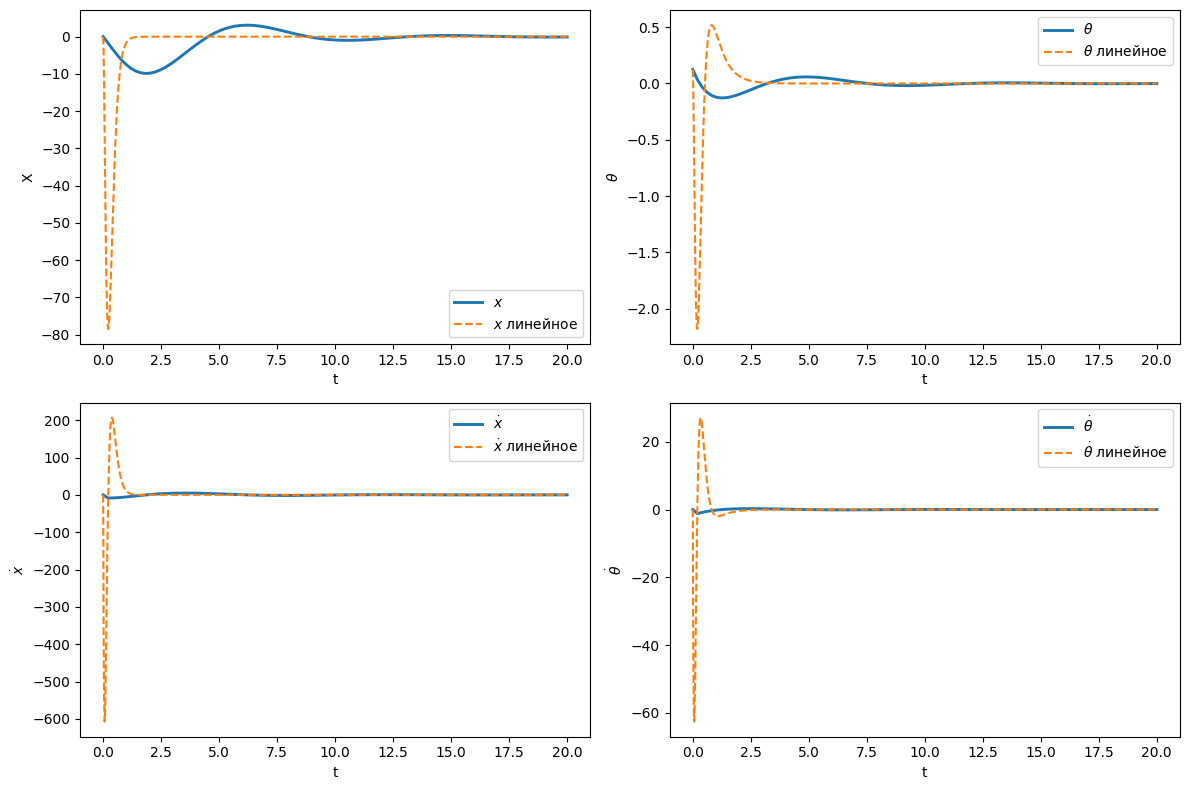

In [41]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

Как мы видим, более отрицательные собственные значения привели к более быстрому затуханию, как и предполагалось. 

### 5 в

Теперь будем двигать собственные числа 0 и 0.521 в комплексно сопряженные числа в левой полуплоскости комплексной плоскости. Затухания должны иметь колебательный характер 

#### Двигаем 2 с.ч. в -2 +- 3i

Рассмотрим сдвиг собственных чисел 0 и 0.521 в -2 +- 3i

In [15]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-2+3j, -2.05945329, -7.50292918, -2-3j]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[  190.01243504 -8675.207539     456.58683891 -4204.52607265]]


In [16]:
Ac = A + B @ K
print(Ac)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.86863929e+02 -8.53139837e+03  4.41531795e+02 -4.13494458e+03]
 [ 2.04966414e+01 -9.34712967e+02  4.84304923e+01 -4.55094177e+02]]


In [17]:
eigenvalues, eigenvectors = np.linalg.eig(Ac)

print("Собственные числа:", eigenvalues)

Собственные числа: [-7.50292918+0.j -2.        +3.j -2.        -3.j -2.05945329+0.j]


Для линейной системы

In [18]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 8, 1000)  # Временной интервал 0-8 секунд
x0 = [0, 0.15, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [19]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

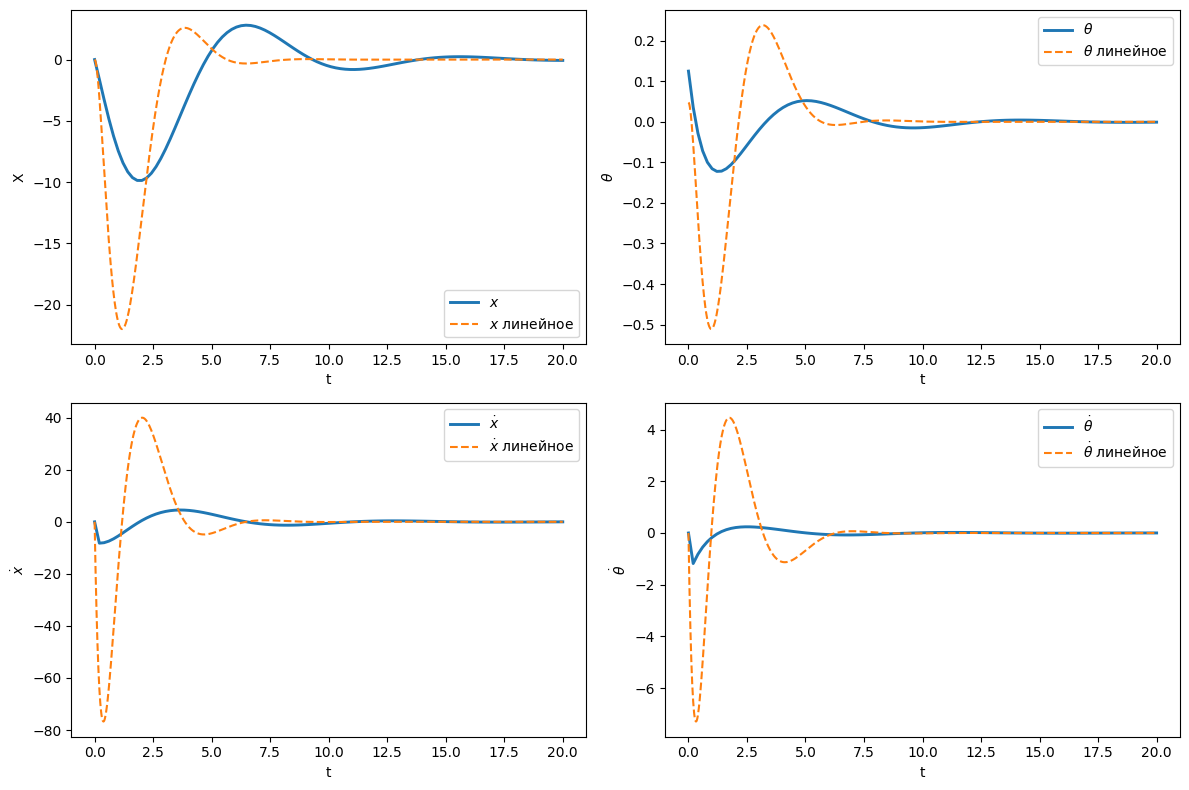

In [20]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

Судя по полученным графикам при использовании полученного регулятора система действительно стабилизируется в вертикальном положении. При этом появились заметные колебания всех траекторий.

#### Двигаем 2 с.ч. в -1/2 +- 2i

Рассмотрим сдвиг собственных чисел 0 и 0.521 в -1/2 +- 2i

Мы уменьшили действительную часть комплексно-сопряженных собственных чисел. Ожидаем увидеть более медленное затухание колебаний, а также увеличение времени переходного процесса.

In [18]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-1/2+2j, -2.05945329, -7.50292918, -1/2-2j]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[   62.11944992 -2848.78376204   149.89774232 -1380.68943356]]


In [19]:
Ac = A + B @ K
print(Ac)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 6.10901306e+01 -2.80151843e+03  1.39924537e+02 -1.35789891e+03]
 [ 6.70082506e+00 -3.06216634e+02  1.53479395e+01 -1.50486919e+02]]


Для линейной системы

In [20]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 8, 1000)  # Временной интервал 0-8 секунд
x0 = [0, 0.15, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [27]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 50.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 50, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

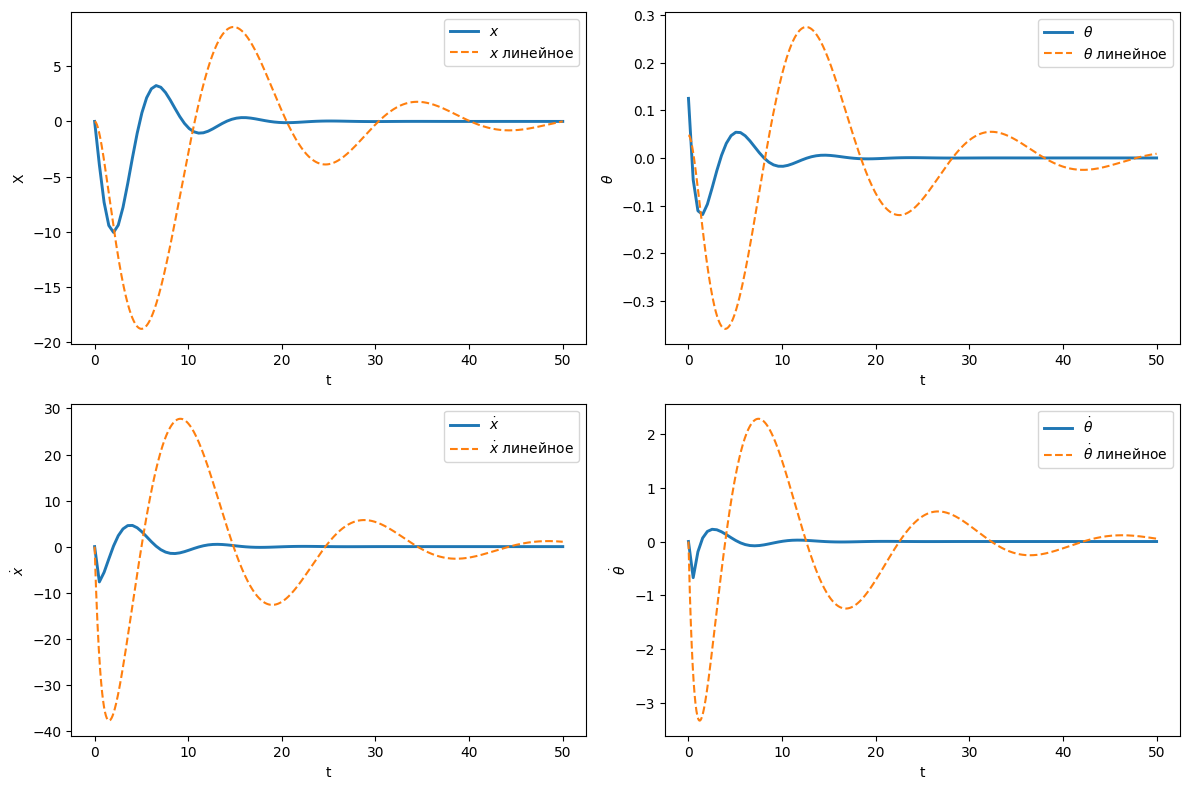

In [28]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

На графиках видно, что колебания затухают медленнее. Время переходного процесса заметно увеличивается.

#### Двигаем 2 с.ч. в -1/2 +- 8i

Рассмотрим сдвиг собственных чисел 0 и 0.521 в -1/2 +- 8i

Мы увеличили мнимую часть комплексно-сопряженных собственных чисел. Ожидаем увидеть увеличение частоты колебаний по сравнению с предыдущим случаем. 

In [91]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-1/2+8j, -2.05945329, -7.50292918, -1/2-8j]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[   939.09991933 -36746.01300511   1952.02535742 -17810.33957275]]


In [92]:
Ac = A + B @ K
print(Ac)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 9.23539034e+02 -3.61370706e+04  1.91219090e+03 -1.75153097e+04]
 [ 1.01300708e+02 -3.96271075e+03  2.09743445e+02 -1.92275328e+03]]


Для линейной системы

In [93]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 8, 1000)  # Временной интервал 0-8 секунд
x0 = [0, 0.15, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

Для нелинейной системы

In [94]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

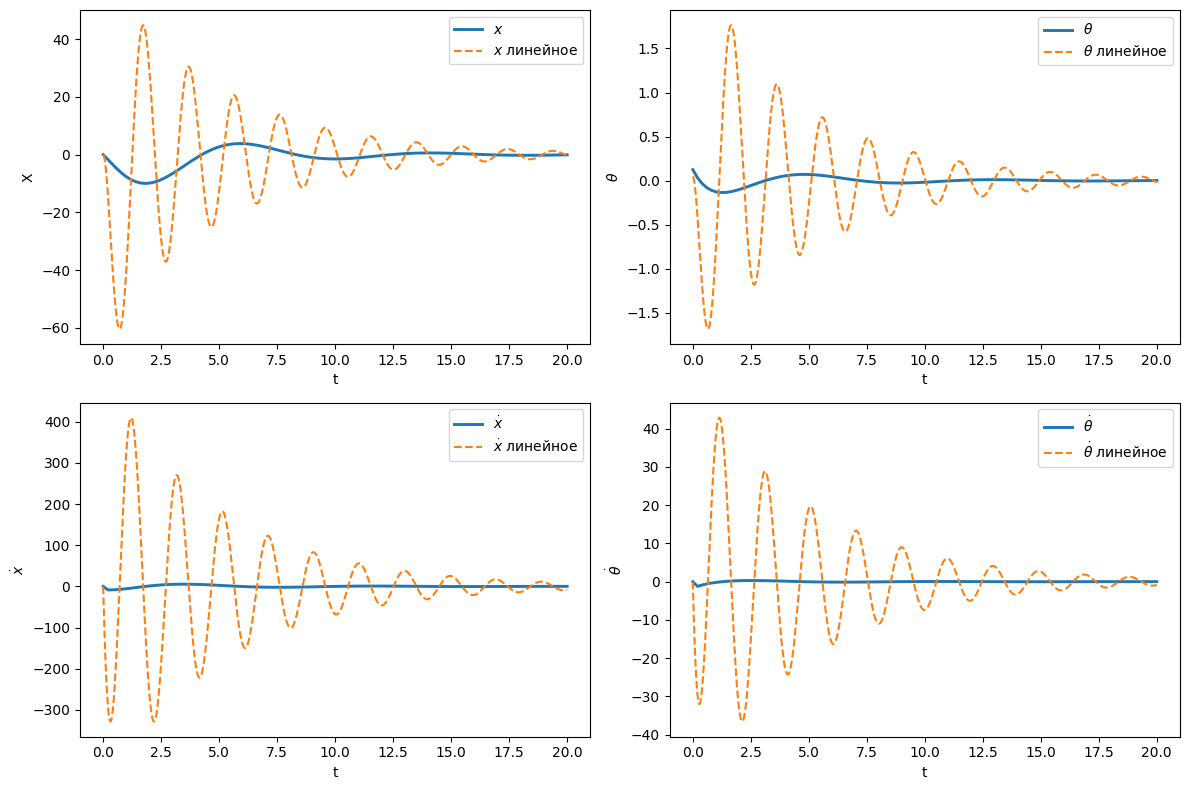

In [95]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

На графике, линейные системы демонстрируют более быстрые колебания, чем в предыдущем случае. Колебания затухают примерно с той же скоростью, но из-за высокой частоты их гораздо больше в течение определенного временного интервала. 

## 6


In [3]:
P_ = np.array([
    [0.00327109, 0.88683569, 0.00170434, 0.46207018],
    [1,     0,      0,     0],
    [0,     1,      0,     0],
    [0,     0,      1,     0]
]) 
P = np.linalg.inv(P_)

print("P:\n", P) 

P:
 [[ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 2.16417342 -0.00707921 -1.91926622 -0.00368849]]


In [4]:
C = np.array([
    [1,     0,      0,     0],
    [0,     1,      0,     0],
]) 

Theta1, Theta2, lambda_ = sp.symbols('Theta1 Theta2 lambda')

L_hat = sp.Matrix([
    [Theta1, Theta2, 0, 0],
    [Theta1, Theta2, 0, 0]
])

term1 = P_ @ A.T @ P

term2 = P_ @ C.T @ L_hat

result = term1 - term2

sp.pprint(result, wrap_line=False)

⎡0.521032494481899 - 0.89010678⋅Θ₁  -0.89010678⋅Θ₂ - 4.18237479361207e-9  -3.17562757049169e-8  3.32870047237373e-8⎤
⎢                                                                                                                  ⎥
⎢             -1.0⋅Θ₁                             -1.0⋅Θ₂                          0                     0         ⎥
⎢                                                                                                                  ⎥
⎢      2.34092145916016 - Θ₁             -Θ₂ - 0.00765736477584422         -2.07601269747011     0.056995273920295 ⎥
⎢                                                                                                                  ⎥
⎣        -1.77793338665568                    1.00581578012176              1.57673478172883     -7.48636979701179 ⎦


In [5]:
A_hat = sp.Matrix([
    [0.521032494481899 - 0.89010678*Theta1,     -0.89010678*Theta2 - 4.18237479361207e-9],
    [-1.0*Theta1,     -1.0*Theta2],
])

char_poly = (A_hat - lambda_ * sp.eye(2)).det()

char_poly_simplified = sp.simplify(char_poly)

print("Характеристический полином:")
sp.pprint(char_poly_simplified, wrap_line=False)

Характеристический полином:
                                                                              2                      
0.89010678⋅Θ₁⋅λ - 4.18237479361207e-9⋅Θ₁ + 1.0⋅Θ₂⋅λ - 0.521032494481899⋅Θ₂ + λ  - 0.521032494481899⋅λ


### 6 a

Предполагается, что система будет стремиться к состоянию равновесия асимптотически

#### Двигаем 2 с.ч. в -1

In [6]:
eq1 = char_poly.subs(lambda_, -1)

# Находим производную полинома и подставляем λ = -1
char_poly_derivative = sp.diff(char_poly, lambda_)
eq2 = char_poly_derivative.subs(lambda_, -1)

# 3. Решаем систему уравнений
solutions = sp.solve([eq1, eq2], [Theta1, Theta2], dict=True)

print("\nНайденные решения:")
for sol in solutions:
    print(f"Θ1 = {sol[Theta1].evalf()}, Θ2 = {sol[Theta2].evalf()}")


Найденные решения:
Θ1 = 4.98850107343890, Θ2 = -1.91926613302334


In [7]:
L_hat = np.array([
    [4.98850107343890, -1.91926613302334, 0, 0],
    [4.98850107343890, -1.91926613302334, 0, 0]
])

L = (L_hat @ P_).T
print("L:\n", L)

L:
 [[-1.9029483  -1.9029483 ]
 [ 4.42398079  4.42398079]
 [ 0.0085021   0.0085021 ]
 [ 2.30503759  2.30503759]]


In [8]:
Ac = A - L @ C
Ac

array([[ 1.9029483 ,  1.9029483 ,  1.        ,  0.        ],
       [-4.42398079, -4.42398079,  0.        ,  1.        ],
       [-0.0085021 ,  0.0524829 , -7.4894    , -0.0875    ],
       [-2.30503759, -1.22336759, -0.82153   , -1.55195   ]])

In [21]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        -L[0][0] * y1 + -L[0][1] * y2 + y3,
        -L[1][0] * y1 + -L[1][1] * y2 + y4,
        (f1*D1 + f2 * C1 * np.cos(y2))/(A1*D1-(C1*np.cos(y2))**2) + -L[2][0] * y1 + -L[2][1] * y2,
        (f1 * C1 * np.cos(y2) + f2 * A1)/(A1*D1 - (C1*np.cos(y2))**2) + -L[3][0] * y1 + -L[3][1] * y2,
    ]

    return dydt


# Начальные условия
x0 = 0.0
xT = 20.0
y0 = [0.2, 0.15, 0.2, 0.3] 
x_span = (x0, xT)  # интервал по x

# Решаем систему
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))


u_nonlin = L[0][0]*sol.y[0] + L[1][0]*sol.y[1] + L[2][0]*sol.y[2] + L[3][0]*sol.y[3]
u_lin = L[0][0]*solLineal.y[0] + L[1][0]*solLineal.y[1] + L[2][0]*solLineal.y[2] + L[3][0]*solLineal.y[3]


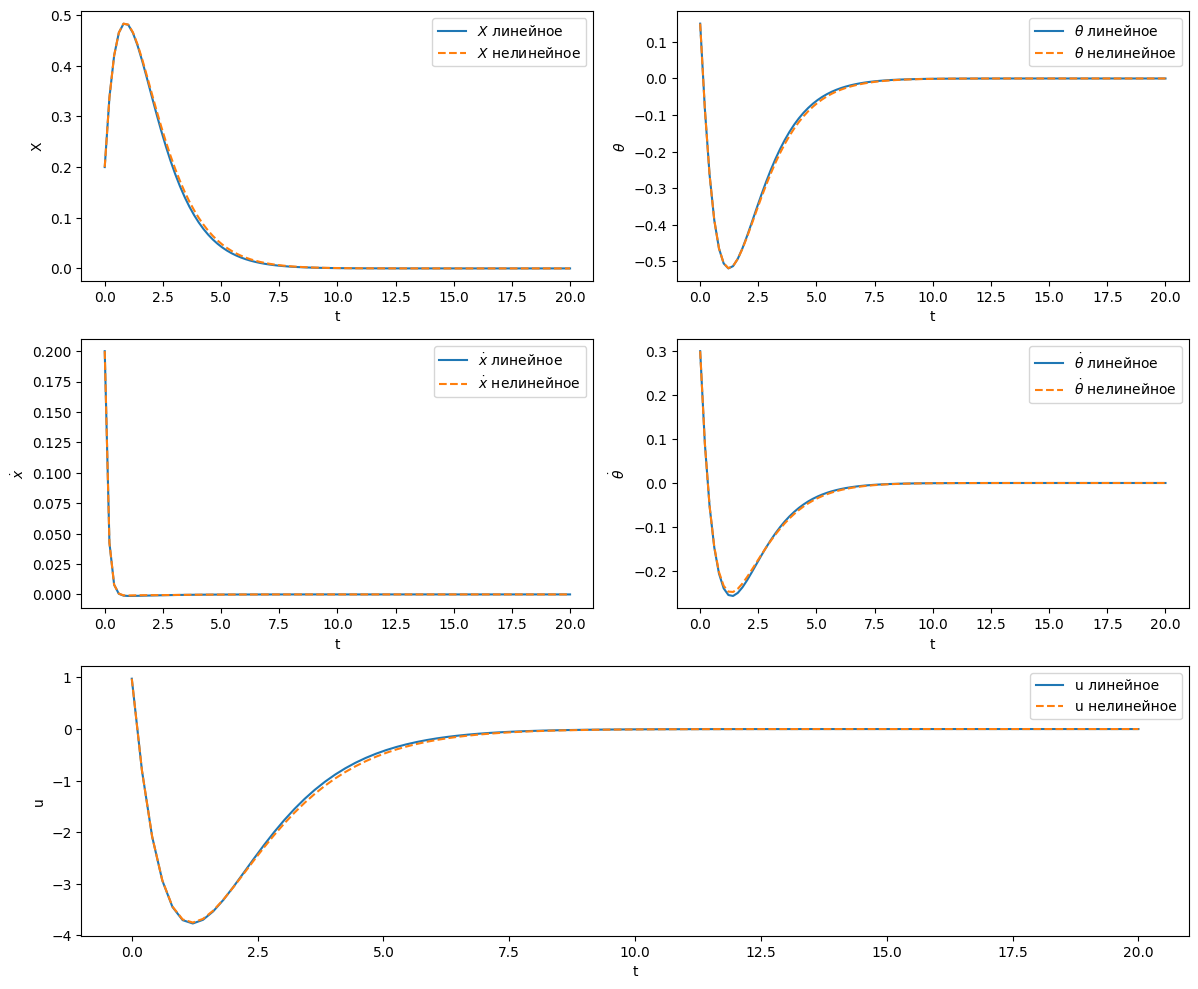

In [22]:
plt.figure(figsize=(12, 10))  # Увеличиваем высоту фигуры, чтобы вместить 5 графиков

# График x1 (позиция)
plt.subplot(3, 2, 1) # 3 строки, 2 столбца, позиция 1
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное')
plt.plot(sol.t, sol.y[0], label='$X$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(3, 2, 2) # 3 строки, 2 столбца, позиция 2
plt.plot(solLineal.t, solLineal.y[1], label=r'$\theta$ линейное')
plt.plot(sol.t, sol.y[1], label=r'$\theta$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(3, 2, 3) # 3 строки, 2 столбца, позиция 3
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(3, 2, 4) # 3 строки, 2 столбца, позиция 4
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

# График управления (занимает ширину двух графиков)
plt.subplot(3, 1, 3) # 3 строки, 1 столбец, позиция 3 (занимает всю третью строку)
plt.plot(solLineal.t, u_lin, label='u линейное')
plt.plot(sol.t, u_nonlin, label='u нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('u')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

По графикам видно, что система стабилизируется в вертикальном положении.

#### Двигаем 2 с.ч. в -1/2

Мы ожидаем, что переходные процессы будут происходить медленнее, чем в предыдущем случае. Следовательно, время, необходимое для достижения устойчивого состояния, увеличится.

In [23]:
eq1 = char_poly.subs(lambda_, -1/2)

# Находим производную полинома и подставляем λ = -1
char_poly_derivative = sp.diff(char_poly, lambda_)
eq2 = char_poly_derivative.subs(lambda_, -1/2)

# 3. Решаем систему уравнений
solutions = sp.solve([eq1, eq2], [Theta1, Theta2], dict=True)

print("\nНайденные решения:")
for sol in solutions:
    print(f"Θ1 = {sol[Theta1].evalf()}, Θ2 = {sol[Theta2].evalf()}")


Найденные решения:
Θ1 = 2.24787528949150, Θ2 = -0.479816541288949


In [24]:
L_hat = np.array([
    [2.24787528949150, -0.479816541288949, 0, 0],
    [2.24787528949150, -0.479816541288949, 0, 0]
])

L = (L_hat @ P_).T
print("L:\n", L)

L:
 [[-0.47246354 -0.47246354]
 [ 1.99349603  1.99349603]
 [ 0.00383114  0.00383114]
 [ 1.03867614  1.03867614]]


In [25]:
Ac = A - L @ C
Ac

array([[ 4.72463539e-01,  4.72463539e-01,  1.00000000e+00,
         0.00000000e+00],
       [-1.99349603e+00, -1.99349603e+00,  0.00000000e+00,
         1.00000000e+00],
       [-3.83114377e-03,  5.71538562e-02, -7.48940000e+00,
        -8.75000000e-02],
       [-1.03867614e+00,  4.29938604e-02, -8.21530000e-01,
        -1.55195000e+00]])

In [28]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        -L[0][0] * y1 + -L[0][1] * y2 + y3,
        -L[1][0] * y1 + -L[1][1] * y2 + y4,
        (f1*D1 + f2 * C1 * np.cos(y2))/(A1*D1-(C1*np.cos(y2))**2) + -L[2][0] * y1 + -L[2][1] * y2,
        (f1 * C1 * np.cos(y2) + f2 * A1)/(A1*D1 - (C1*np.cos(y2))**2) + -L[3][0] * y1 + -L[3][1] * y2,
    ]

    return dydt


# Начальные условия
x0 = 0.0
xT = 20.0
y0 = [0.2, 0.15, 0.2, 0.3] 
x_span = (x0, xT)  # интервал по x

# Решаем систему
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

u_nonlin = L[0][0]*sol.y[0] + L[1][0]*sol.y[1] + L[2][0]*sol.y[2] + L[3][0]*sol.y[3]
u_lin = L[0][0]*solLineal.y[0] + L[1][0]*solLineal.y[1] + L[2][0]*solLineal.y[2] + L[3][0]*solLineal.y[3]

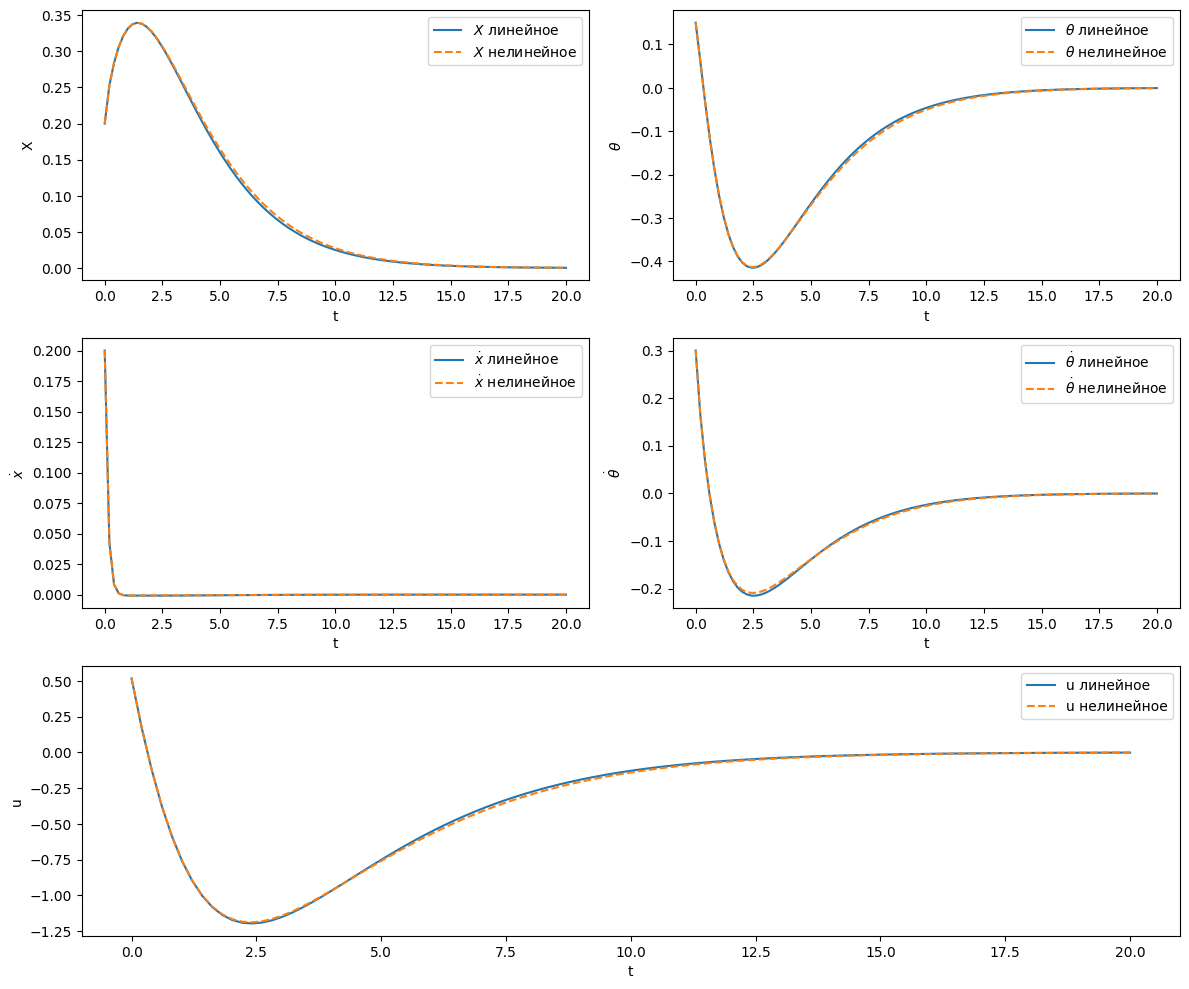

In [29]:
plt.figure(figsize=(12, 10))  # Увеличиваем высоту фигуры, чтобы вместить 5 графиков

# График x1 (позиция)
plt.subplot(3, 2, 1) # 3 строки, 2 столбца, позиция 1
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное')
plt.plot(sol.t, sol.y[0], label='$X$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(3, 2, 2) # 3 строки, 2 столбца, позиция 2
plt.plot(solLineal.t, solLineal.y[1], label=r'$\theta$ линейное')
plt.plot(sol.t, sol.y[1], label=r'$\theta$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(3, 2, 3) # 3 строки, 2 столбца, позиция 3
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(3, 2, 4) # 3 строки, 2 столбца, позиция 4
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

# График управления (занимает ширину двух графиков)
plt.subplot(3, 1, 3) # 3 строки, 1 столбец, позиция 3 (занимает всю третью строку)
plt.plot(solLineal.t, u_lin, label='u линейное')
plt.plot(sol.t, u_nonlin, label='u нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('u')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

Уменьшение величины собственных значений с -1 до -1/2 действительно привело к замедлению затухания, как и ожидалось.

#### Двигаем 2 с.ч. в -10

In [30]:
eq1 = char_poly.subs(lambda_, -10)

# Находим производную полинома и подставляем λ = -1
char_poly_derivative = sp.diff(char_poly, lambda_)
eq2 = char_poly_derivative.subs(lambda_, -10)

# 3. Решаем систему уравнений
solutions = sp.solve([eq1, eq2], [Theta1, Theta2], dict=True)

print("\nНайденные решения:")
for sol in solutions:
    print(f"Θ1 = {sol[Theta1].evalf()}, Θ2 = {sol[Theta2].evalf()}")


Найденные решения:
Θ1 = 238.676581823567, Θ2 = -191.926611213900


In [31]:
L_hat = np.array([
    [238.676581823567, -191.926611213900, 0, 0],
    [238.676581823567, -191.926611213900, 0, 0]
])

L = (L_hat @ P_).T
print("L:\n", L)

L:
 [[-191.14587863 -191.14587863]
 [ 211.66691113  211.66691113]
 [   0.40678605    0.40678605]
 [ 110.28533113  110.28533113]]


In [32]:
Ac = A - L @ C
print(Ac)

[[ 1.91145879e+02  1.91145879e+02  1.00000000e+00  0.00000000e+00]
 [-2.11666911e+02 -2.11666911e+02  0.00000000e+00  1.00000000e+00]
 [-4.06786045e-01 -3.45801045e-01 -7.48940000e+00 -8.75000000e-02]
 [-1.10285331e+02 -1.09203661e+02 -8.21530000e-01 -1.55195000e+00]]


In [35]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        -L[0][0] * y1 + -L[0][1] * y2 + y3,
        -L[1][0] * y1 + -L[1][1] * y2 + y4,
        (f1*D1 + f2 * C1 * np.cos(y2))/(A1*D1-(C1*np.cos(y2))**2) + -L[2][0] * y1 + -L[2][1] * y2,
        (f1 * C1 * np.cos(y2) + f2 * A1)/(A1*D1 - (C1*np.cos(y2))**2) + -L[3][0] * y1 + -L[3][1] * y2,
    ]

    return dydt


# Начальные условия
x0 = 0.0
xT = 10.0
y0 = [0.2, 0.15, 0.2, 0.3] 
x_span = (x0, xT)  # интервал по x

# Решаем систему
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

u_nonlin = L[0][0]*sol.y[0] + L[1][0]*sol.y[1] + L[2][0]*sol.y[2] + L[3][0]*sol.y[3]
u_lin = L[0][0]*solLineal.y[0] + L[1][0]*solLineal.y[1] + L[2][0]*solLineal.y[2] + L[3][0]*solLineal.y[3]

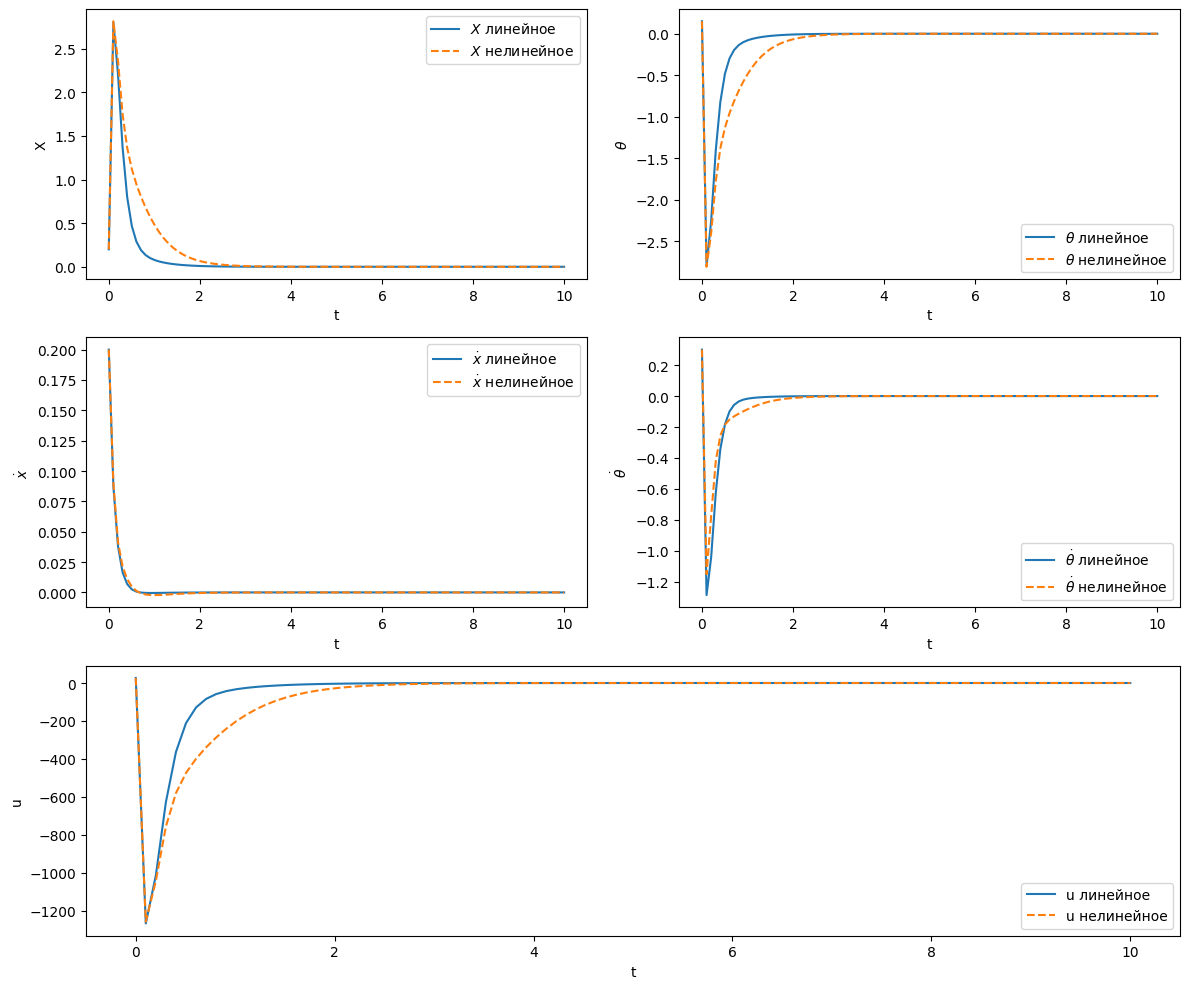

In [36]:
plt.figure(figsize=(12, 10))  # Увеличиваем высоту фигуры, чтобы вместить 5 графиков

# График x1 (позиция)
plt.subplot(3, 2, 1) # 3 строки, 2 столбца, позиция 1
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное')
plt.plot(sol.t, sol.y[0], label='$X$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(3, 2, 2) # 3 строки, 2 столбца, позиция 2
plt.plot(solLineal.t, solLineal.y[1], label=r'$\theta$ линейное')
plt.plot(sol.t, sol.y[1], label=r'$\theta$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(3, 2, 3) # 3 строки, 2 столбца, позиция 3
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(3, 2, 4) # 3 строки, 2 столбца, позиция 4
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

# График управления (занимает ширину двух графиков)
plt.subplot(3, 1, 3) # 3 строки, 1 столбец, позиция 3 (занимает всю третью строку)
plt.plot(solLineal.t, u_lin, label='u линейное')
plt.plot(sol.t, u_nonlin, label='u нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('u')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

### 6 б

#### Двигаем 2 с.ч. в -2 +- 3i

In [37]:
lambda1 = -2 + 3j  
lambda2 = -2 - 3j

eq1 = char_poly.subs('lambda', lambda1)
eq2 = char_poly.subs('lambda', lambda2)

# Решаем систему уравнений для Θ₁ и Θ₂
solutions = sp.solve([sp.re(eq1), sp.re(eq2), sp.im(eq1), sp.im(eq2)], [Theta1, Theta2], dict=True)

print("\nНайденные решения:")
for sol in solutions:
    print(f"Θ1 = {sol[Theta1].evalf()}, Θ2 = {sol[Theta2].evalf()}")


Найденные решения:
Θ1 = 33.1100634566580, Θ2 = -24.9504594745197


In [38]:
L_hat = np.array([
    [33.1100634566580, -24.9504594745197, 0, 0],
    [33.1100634566580, -24.9504594745197, 0, 0]
])

L = (L_hat @ P_).T
print("L:\n", L)

L:
 [[-24.84215348 -24.84215348]
 [ 29.36318597  29.36318597]
 [  0.05643081   0.05643081]
 [ 15.29917298  15.29917298]]


In [39]:
Ac = A - L @ C
print(Ac)

[[ 2.48421535e+01  2.48421535e+01  1.00000000e+00  0.00000000e+00]
 [-2.93631860e+01 -2.93631860e+01  0.00000000e+00  1.00000000e+00]
 [-5.64308056e-02  4.55419445e-03 -7.48940000e+00 -8.75000000e-02]
 [-1.52991730e+01 -1.42175030e+01 -8.21530000e-01 -1.55195000e+00]]


In [42]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        -L[0][0] * y1 + -L[0][1] * y2 + y3,
        -L[1][0] * y1 + -L[1][1] * y2 + y4,
        (f1*D1 + f2 * C1 * np.cos(y2))/(A1*D1-(C1*np.cos(y2))**2) + -L[2][0] * y1 + -L[2][1] * y2,
        (f1 * C1 * np.cos(y2) + f2 * A1)/(A1*D1 - (C1*np.cos(y2))**2) + -L[3][0] * y1 + -L[3][1] * y2,
    ]

    return dydt

# Начальные условия
x0 = 0.0
xT = 10.0
y0 = [0.2, 0.15, 0.2, 0.3] 
x_span = (x0, xT)  # интервал по x

# Решаем систему
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

u_nonlin = L[0][0]*sol.y[0] + L[1][0]*sol.y[1] + L[2][0]*sol.y[2] + L[3][0]*sol.y[3]
u_lin = L[0][0]*solLineal.y[0] + L[1][0]*solLineal.y[1] + L[2][0]*solLineal.y[2] + L[3][0]*solLineal.y[3]

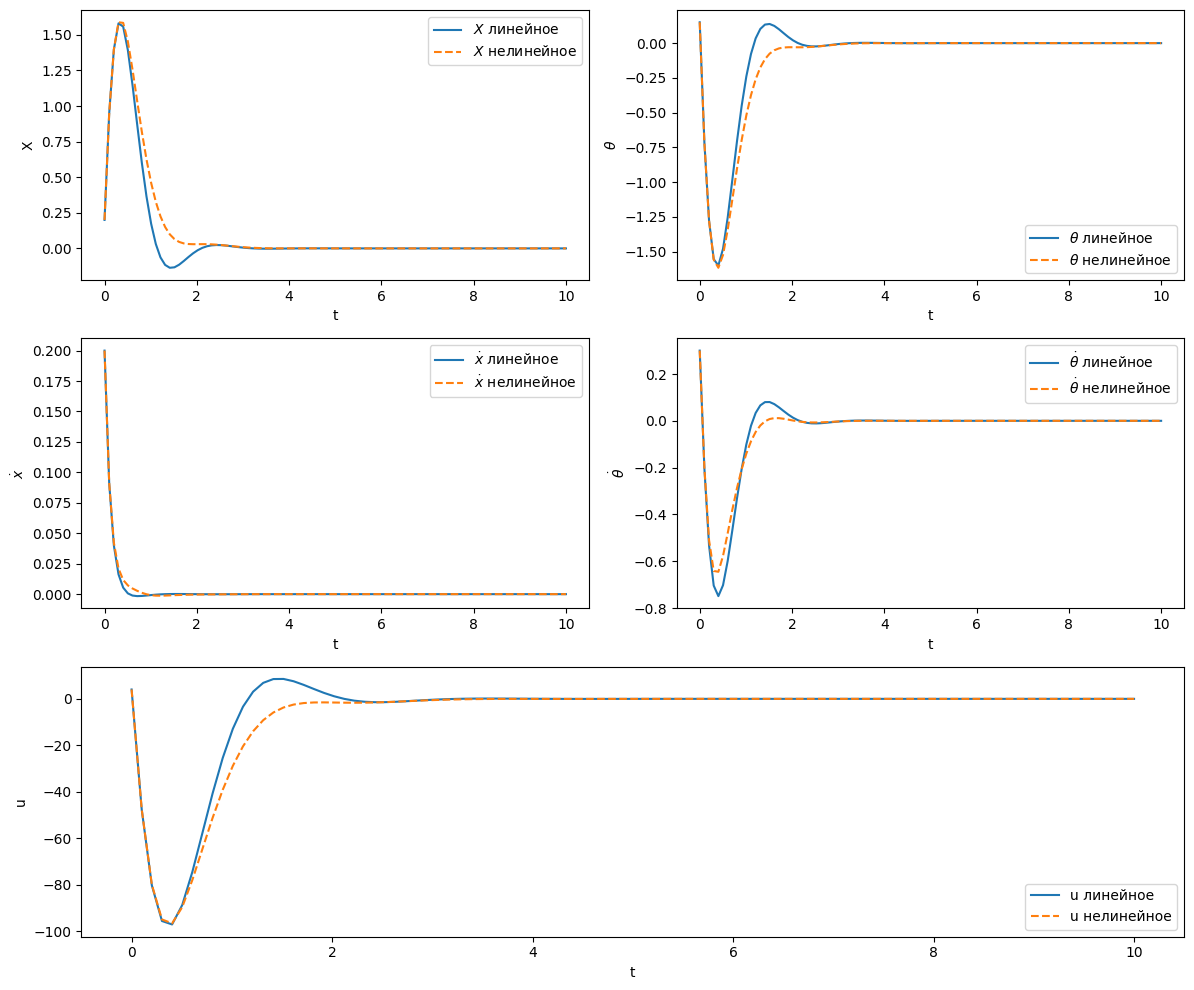

In [43]:
plt.figure(figsize=(12, 10))  # Увеличиваем высоту фигуры, чтобы вместить 5 графиков

# График x1 (позиция)
plt.subplot(3, 2, 1) # 3 строки, 2 столбца, позиция 1
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное')
plt.plot(sol.t, sol.y[0], label='$X$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(3, 2, 2) # 3 строки, 2 столбца, позиция 2
plt.plot(solLineal.t, solLineal.y[1], label=r'$\theta$ линейное')
plt.plot(sol.t, sol.y[1], label=r'$\theta$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(3, 2, 3) # 3 строки, 2 столбца, позиция 3
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(3, 2, 4) # 3 строки, 2 столбца, позиция 4
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

# График управления (занимает ширину двух графиков)
plt.subplot(3, 1, 3) # 3 строки, 1 столбец, позиция 3 (занимает всю третью строку)
plt.plot(solLineal.t, u_lin, label='u линейное')
plt.plot(sol.t, u_nonlin, label='u нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('u')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

#### Двигаем 2 с.ч. в -1/2 +- 2i

In [44]:
lambda1 = -1/2 + 2j  
lambda2 = -1/2 - 2j

eq1 = char_poly.subs('lambda', lambda1)
eq2 = char_poly.subs('lambda', lambda2)

# Решаем систему уравнений для Θ₁ и Θ₂
solutions = sp.solve([sp.re(eq1), sp.re(eq2), sp.im(eq1), sp.im(eq2)], [Theta1, Theta2], dict=True)

print("\nНайденные решения:")
for sol in solutions:
    print(f"Θ1 = {sol[Theta1].evalf()}, Θ2 = {sol[Theta2].evalf()}")


Найденные решения:
Θ1 = 10.8727556000914, Θ2 = -8.15688098244241


In [45]:
L_hat = np.array([
    [10.8727556000914, -8.15688098244241, 0, 0],
    [10.8727556000914, -8.15688098244241, 0, 0]
])

L = (L_hat @ P_).T
print("L:\n", L)

L:
 [[-8.12131522 -8.12131522]
 [ 9.64234771  9.64234771]
 [ 0.01853087  0.01853087]
 [ 5.02397614  5.02397614]]


In [46]:
Ac = A - L @ C
print(Ac)

[[ 8.12131522  8.12131522  1.          0.        ]
 [-9.64234771 -9.64234771  0.          1.        ]
 [-0.01853087  0.04245413 -7.4894     -0.0875    ]
 [-5.02397614 -3.94230614 -0.82153    -1.55195   ]]


In [47]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        -L[0][0] * y1 + -L[0][1] * y2 + y3,
        -L[1][0] * y1 + -L[1][1] * y2 + y4,
        (f1*D1 + f2 * C1 * np.cos(y2))/(A1*D1-(C1*np.cos(y2))**2) + -L[2][0] * y1 + -L[2][1] * y2,
        (f1 * C1 * np.cos(y2) + f2 * A1)/(A1*D1 - (C1*np.cos(y2))**2) + -L[3][0] * y1 + -L[3][1] * y2,
    ]

    return dydt

# Начальные условия
x0 = 0.0
xT = 10.0
y0 = [0.2, 0.15, 0.2, 0.3] 
x_span = (x0, xT)  # интервал по x

# Решаем систему
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

u_nonlin = L[0][0]*sol.y[0] + L[1][0]*sol.y[1] + L[2][0]*sol.y[2] + L[3][0]*sol.y[3]
u_lin = L[0][0]*solLineal.y[0] + L[1][0]*solLineal.y[1] + L[2][0]*solLineal.y[2] + L[3][0]*solLineal.y[3]

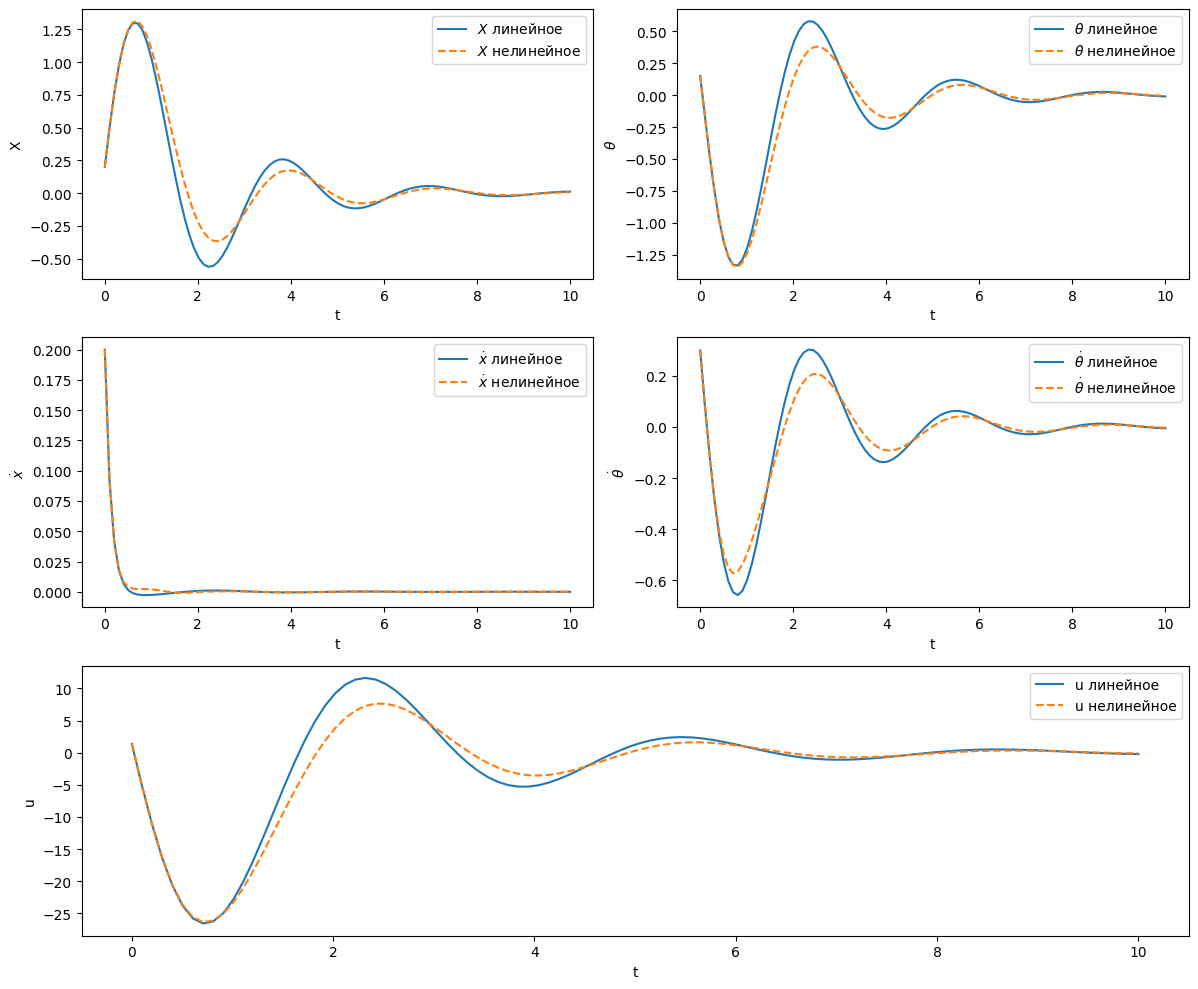

In [48]:
plt.figure(figsize=(12, 10))  # Увеличиваем высоту фигуры, чтобы вместить 5 графиков

# График x1 (позиция)
plt.subplot(3, 2, 1) # 3 строки, 2 столбца, позиция 1
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное')
plt.plot(sol.t, sol.y[0], label='$X$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(3, 2, 2) # 3 строки, 2 столбца, позиция 2
plt.plot(solLineal.t, solLineal.y[1], label=r'$\theta$ линейное')
plt.plot(sol.t, sol.y[1], label=r'$\theta$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(3, 2, 3) # 3 строки, 2 столбца, позиция 3
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(3, 2, 4) # 3 строки, 2 столбца, позиция 4
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

# График управления (занимает ширину двух графиков)
plt.subplot(3, 1, 3) # 3 строки, 1 столбец, позиция 3 (занимает всю третью строку)
plt.plot(solLineal.t, u_lin, label='u линейное')
plt.plot(sol.t, u_nonlin, label='u нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('u')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

#### Двигаем 2 с.ч. в -1/2 +- 8i

In [49]:
lambda1 = -1/2 + 8j  
lambda2 = -1/2 - 8j

eq1 = char_poly.subs('lambda', lambda1)
eq2 = char_poly.subs('lambda', lambda2)

# Решаем систему уравнений для Θ₁ и Θ₂
solutions = sp.solve([sp.re(eq1), sp.re(eq2), sp.im(eq1), sp.im(eq2)], [Theta1, Theta2], dict=True)

print("\nНайденные решения:")
for sol in solutions:
    print(f"Θ1 = {sol[Theta1].evalf()}, Θ2 = {sol[Theta2].evalf()}")


Найденные решения:
Θ1 = 140.245960259090, Θ2 = -123.312847599744


In [50]:
L_hat = np.array([
    [140.245960259090, -123.312847599744, 0, 0],
    [140.245960259090, -123.312847599744, 0, 0]
])

L = (L_hat @ P_).T
print("L:\n", L)

L:
 [[-122.85409044 -122.85409044]
 [ 124.37512294  124.37512294]
 [   0.2390268     0.2390268 ]
 [  64.8034761    64.8034761 ]]


In [51]:
Ac = A - L @ C
print(Ac)

[[ 1.22854090e+02  1.22854090e+02  1.00000000e+00  0.00000000e+00]
 [-1.24375123e+02 -1.24375123e+02  0.00000000e+00  1.00000000e+00]
 [-2.39026800e-01 -1.78041800e-01 -7.48940000e+00 -8.75000000e-02]
 [-6.48034761e+01 -6.37218061e+01 -8.21530000e-01 -1.55195000e+00]]


In [54]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        -L[0][0] * y1 + -L[0][1] * y2 + y3,
        -L[1][0] * y1 + -L[1][1] * y2 + y4,
        (f1*D1 + f2 * C1 * np.cos(y2))/(A1*D1-(C1*np.cos(y2))**2) + -L[2][0] * y1 + -L[2][1] * y2,
        (f1 * C1 * np.cos(y2) + f2 * A1)/(A1*D1 - (C1*np.cos(y2))**2) + -L[3][0] * y1 + -L[3][1] * y2,
    ]

    return dydt

# Начальные условия
x0 = 0.0
xT = 8.0
y0 = [0.2, 0.15, 0.2, 0.3] 
x_span = (x0, xT)  # интервал по x

# Решаем систему
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

u_nonlin = L[0][0]*sol.y[0] + L[1][0]*sol.y[1] + L[2][0]*sol.y[2] + L[3][0]*sol.y[3]
u_lin = L[0][0]*solLineal.y[0] + L[1][0]*solLineal.y[1] + L[2][0]*solLineal.y[2] + L[3][0]*solLineal.y[3]

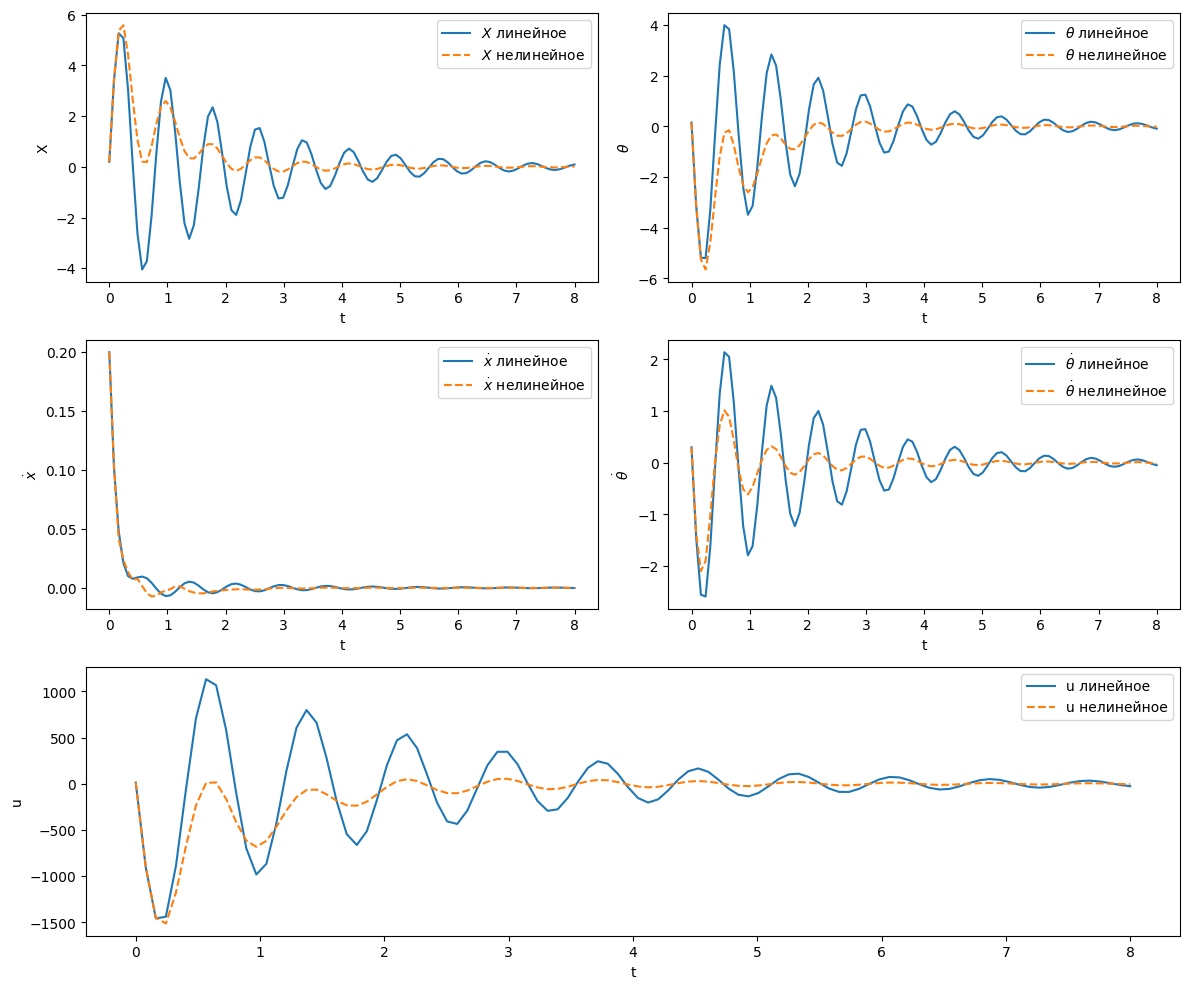

In [55]:
plt.figure(figsize=(12, 10))  # Увеличиваем высоту фигуры, чтобы вместить 5 графиков

# График x1 (позиция)
plt.subplot(3, 2, 1) # 3 строки, 2 столбца, позиция 1
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное')
plt.plot(sol.t, sol.y[0], label='$X$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(3, 2, 2) # 3 строки, 2 столбца, позиция 2
plt.plot(solLineal.t, solLineal.y[1], label=r'$\theta$ линейное')
plt.plot(sol.t, sol.y[1], label=r'$\theta$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(3, 2, 3) # 3 строки, 2 столбца, позиция 3
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(3, 2, 4) # 3 строки, 2 столбца, позиция 4
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$ нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

# График управления (занимает ширину двух графиков)
plt.subplot(3, 1, 3) # 3 строки, 1 столбец, позиция 3 (занимает всю третью строку)
plt.plot(solLineal.t, u_lin, label='u линейное')
plt.plot(sol.t, u_nonlin, label='u нелинейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('u')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

## 7

In [42]:
A_init_mat = np.array([
    [0, 0,         1,             0],
    [0, 0,         0,             1],
    [0, 0.060985, -7.4894,  -0.0875],
    [0, 1.08167, -0.82153, -1.55195]
])
B_mat = np.array([
    0,
    0,
    0.98343,
    0.10787
])

CONTROL_COEFFICIENTS= np.array([
    190.01243504,
    -8675.207539,
    456.58683891,
    -4204.52607265
])

L_mat = np.array([
    [-24.84215348, -24.84215348],
    [29.36318597, 29.36318597],
    [0.05643081, 0.05643081],
    [15.29917298, 15.29917298]
])

g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

RTOL_MAX = 1e-13
MAX_TIME_PLOT = 15.0
INIT_POINT = [0.0, np.pi/8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

T_SPAN = [0, 10]
T_EVAL = np.linspace(*T_SPAN, 1000)

def rhs_linear_controlled(t, X):
    x1, x2, x3, x4, y1, y2, y3, y4 = X

    V = CONTROL_COEFFICIENTS[0] * y1 + CONTROL_COEFFICIENTS[1] * y2 + CONTROL_COEFFICIENTS[2] * y3 + CONTROL_COEFFICIENTS[3] * y4

    _x1 = A_init_mat[0, 0] * x1 + A_init_mat[0, 1] * x2 + A_init_mat[0, 2] * x3 + A_init_mat[0, 3] * x4 + V * B_mat[0]
    _x2 = A_init_mat[1, 0] * x1 + A_init_mat[1, 1] * x2 + A_init_mat[1, 2] * x3 + A_init_mat[1, 3] * x4 + V * B_mat[1]
    _x3 = A_init_mat[2, 0] * x1 + A_init_mat[2, 1] * x2 + A_init_mat[2, 2] * x3 + A_init_mat[2, 3] * x4 + V * B_mat[2]
    _x4 = A_init_mat[3, 0] * x1 + A_init_mat[3, 1] * x2 + A_init_mat[3, 2] * x3 + A_init_mat[3, 3] * x4 + V * B_mat[3]

    _y1 = A_init_mat[0, 0] * y1 + A_init_mat[0, 1] * y2 + A_init_mat[0, 2] * y3 + A_init_mat[0, 3] * y4 + V * B_mat[0] + L_mat[0, 0] * (x1 - y1) + L_mat[0, 1] * (x2 - y2)
    _y2 = A_init_mat[1, 0] * y1 + A_init_mat[1, 1] * y2 + A_init_mat[1, 2] * y3 + A_init_mat[1, 3] * y4 + V * B_mat[1] + L_mat[1, 0] * (x1 - y1) + L_mat[1, 1] * (x2 - y2)
    _y3 = A_init_mat[2, 0] * y1 + A_init_mat[2, 1] * y2 + A_init_mat[2, 2] * y3 + A_init_mat[2, 3] * y4 + V * B_mat[2] + L_mat[2, 0] * (x1 - y1) + L_mat[2, 1] * (x2 - y2)
    _y4 = A_init_mat[3, 0] * y1 + A_init_mat[3, 1] * y2 + A_init_mat[3, 2] * y3 + A_init_mat[3, 3] * y4 + V * B_mat[3] + L_mat[3, 0] * (x1 - y1) + L_mat[3, 1] * (x2 - y2)

    return [_x1,
            _x2,
            _x3,
            _x4,
            _y1,
            _y2,
            _y3,
            _y4]

# Вектор правой части для нелинейной системы с управлением
def rhs_nonlinear_controlled(t, X):
    try:
        x1, x2, x3, x4, y1, y2, y3, y4 = X

        V = CONTROL_COEFFICIENTS[0] * y1 + CONTROL_COEFFICIENTS[1] * y2 + CONTROL_COEFFICIENTS[2] * y3 + CONTROL_COEFFICIENTS[3] * y4

        #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4

        # _x1 = x3 
        # _x2 = x4  
        # _x3 = (m * x4 * np.cos(x2) - m * x4**2 * np.sin(x2)) / (m + M)
        # _x4 = (m * l * _x3 * np.cos(x2) + m * g * l * np.sin(x2)) / (I + m * l**2)

        f1 = -K1*x3 - C1 * x4**2 * np.sin(x2)
        f2 = -Bp*x4 + C1 * g * np.sin(x2)

        _x1 = x3
        _x2 = x4
        _x3 = (f1*D1 + f2 * C1 * np.cos(x2))/(A1*D1-(C1*np.cos(x2))**2)
        _x4 = (f1 * C1 * np.cos(x2) + f2 * A1)/(A1*D1 - (C1*np.cos(x2))**2)


        _y1 = A_init_mat[0, 0] * y1 + A_init_mat[0, 1] * y2 + A_init_mat[0, 2] * y3 + A_init_mat[0, 3] * y4 + V * B_mat[0] + L_mat[0, 0] * (x1 - y1) + L_mat[0, 1] * (x2 - y2)
        _y2 = A_init_mat[1, 0] * y1 + A_init_mat[1, 1] * y2 + A_init_mat[1, 2] * y3 + A_init_mat[1, 3] * y4 + V * B_mat[1] + L_mat[1, 0] * (x1 - y1) + L_mat[1, 1] * (x2 - y2)
        _y3 = A_init_mat[2, 0] * y1 + A_init_mat[2, 1] * y2 + A_init_mat[2, 2] * y3 + A_init_mat[2, 3] * y4 + V * B_mat[2] + L_mat[2, 0] * (x1 - y1) + L_mat[2, 1] * (x2 - y2)
        _y4 = A_init_mat[3, 0] * y1 + A_init_mat[3, 1] * y2 + A_init_mat[3, 2] * y3 + A_init_mat[3, 3] * y4 + V * B_mat[3] + L_mat[3, 0] * (x1 - y1) + L_mat[3, 1] * (x2 - y2)

        return [_x1,
                _x2,
                _x3,
                _x4,
                _y1,
                _y2,
                _y3,
                _y4]
    except Exception as e:
        print(f"Ошибка в вычислениях: {e}")
        return np.zeros(8)


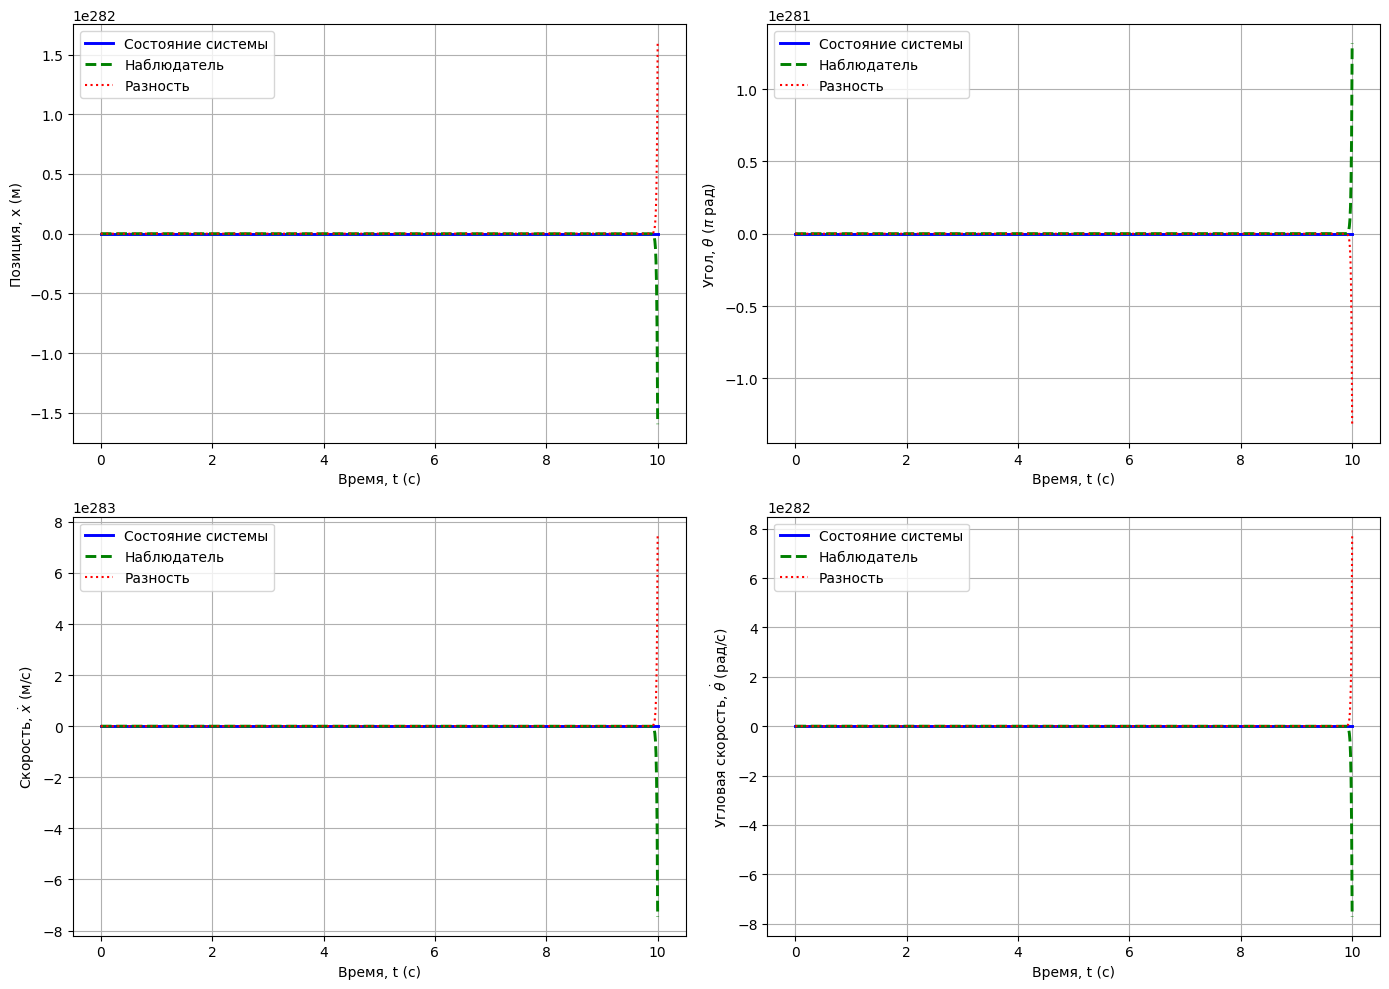

In [43]:
sol = solve_ivp(rhs_nonlinear_controlled, T_SPAN, INIT_POINT, t_eval=T_EVAL, method='RK45')

# Построение графиков
plt.figure(figsize=(14, 10))

# График x1 (позиция)
plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], 'b-', label='Состояние системы', linewidth=2.1)
plt.plot(sol.t, sol.y[4], 'g--', label='Наблюдатель', linewidth=2.1)
plt.plot(sol.t, sol.y[0] - sol.y[4], 'r:', label='Разность', linewidth=1.5)
plt.xlabel('Время, t (с)')
plt.ylabel('Позиция, x (м)')
plt.grid(True)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1]/np.pi, 'b-', label='Состояние системы', linewidth=2.1)
plt.plot(sol.t, sol.y[5]/np.pi, 'g--', label='Наблюдатель', linewidth=2.1)
plt.plot(sol.t, (sol.y[1] - sol.y[5])/np.pi, 'r:', label='Разность', linewidth=1.5)
plt.xlabel('Время, t (с)')
plt.ylabel(r'Угол, $\theta$ ($\pi$ рад)')
plt.grid(True)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], 'b-', label='Состояние системы', linewidth=2.1)
plt.plot(sol.t, sol.y[6], 'g--', label='Наблюдатель', linewidth=2.1)
plt.plot(sol.t, sol.y[2] - sol.y[6], 'r:', label='Разность', linewidth=1.5)
plt.xlabel('Время, t (с)')
plt.ylabel(r'Скорость, $\dot{x}$ (м/с)')
plt.grid(True)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], 'b-', label='Состояние системы', linewidth=2.1)
plt.plot(sol.t, sol.y[7], 'g--', label='Наблюдатель', linewidth=2.1)
plt.plot(sol.t, sol.y[3] - sol.y[7], 'r:', label='Разность', linewidth=1.5)
plt.xlabel('Время, t (с)')
plt.ylabel(r'Угловая скорость, $\dot{\theta}$ (рад/с)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# def plot_time(function):
#     def plot_time_sub(_fig = None, _axs = None, _fig_ctrl = None, _axs_ctrl = None, pnt = [0, 0, 0, 0], diff_scale = [1, 1, 1, 1], tlim = MAX_TIME_PLOT, clr1 = 'b-', clr2 = 'g:', clr3 = 'r-', is_controlled = False):
#         solution = solve_ivp(function, [0.0, tlim], pnt, method='RK45', rtol=RTOL_MAX)

#         data = {}
#         if _fig == None and _axs == None:
#             data["fig"], data["axs"] = plt.subplots((5) if (is_controlled) else (4), 1, figsize=(10, (25) if (is_controlled) else (20)))
#         else:
#             data["fig"], data["axs"] = _fig, _axs
        
#         data["axs"][0].set_xlabel("Время (t)")
#         data["axs"][0].set_ylabel('x')
#         data["axs"][0].plot(solution.t, solution.y[0], clr1)
#         data["axs"][0].plot(solution.t, solution.y[4], clr2)
#         data["axs"][0].plot(solution.t, abs(solution.y[4] - solution.y[0]) * diff_scale[0], clr3)
#         data["axs"][0].legend(["Состояние системы", "Состояние наблюдателя", "Разность"])
        
#         data["axs"][1].set_xlabel("Время (t)")
#         data["axs"][1].set_ylabel(r'$\theta$')
#         data["axs"][1].plot(solution.t, solution.y[2], clr1)
#         data["axs"][1].plot(solution.t, solution.y[6], clr2)
#         data["axs"][1].plot(solution.t, abs(solution.y[6] - solution.y[2]) * diff_scale[1], clr3)
#         data["axs"][1].legend(["Состояние системы", "Состояние наблюдателя", "Разность"])
        
#         data["axs"][2].set_xlabel("Время (t)")
#         data["axs"][2].set_ylabel(r'$\dot{x}$')
#         data["axs"][2].plot(solution.t, solution.y[1], clr1)
#         data["axs"][2].plot(solution.t, solution.y[5], clr2)
#         data["axs"][2].plot(solution.t, abs(solution.y[5] - solution.y[1]) * diff_scale[2], clr3)
#         data["axs"][2].legend(["Состояние системы", "Состояние наблюдателя", "Разность"])
        
#         data["axs"][3].set_xlabel("Время (t)")
#         data["axs"][3].set_ylabel(r'$\dot{\theta}$')
#         data["axs"][3].plot(solution.t, solution.y[3], clr1)
#         data["axs"][3].plot(solution.t, solution.y[7], clr2)
#         data["axs"][3].plot(solution.t, abs(solution.y[7] - solution.y[3]) * diff_scale[3], clr3)
#         data["axs"][3].legend(["Состояние системы", "Состояние наблюдателя", "Разность"])

#         if (is_controlled):
#             data["axs"][4].set_xlabel("Время (t)")
#             data["axs"][4].set_ylabel("Управление (U)")
#             control = [(CONTROL_COEFFICIENTS[0] * solution.y[4][i] +
#                        CONTROL_COEFFICIENTS[1] * solution.y[5][i] +
#                        CONTROL_COEFFICIENTS[2] * solution.y[6][i] +
#                        CONTROL_COEFFICIENTS[3] * solution.y[7][i]) for i in range(len(solution.t))]
#             data["axs"][4].plot(solution.t, control, clr1)

#         return data
#     return plot_time_sub

In [27]:
def plot_time(function):
    def plot_time_sub(_fig=None, _axs=None, _fig_ctrl=None, _axs_ctrl=None, 
                    pnt=INIT_POINT, diff_scale=[1, 1, 1, 1], tlim=MAX_TIME_PLOT, 
                    clr1='b-', clr2='g:', clr3='r-', is_controlled=False):
        
        solution = solve_ivp(function, [0.0, tlim], pnt, method='RK45', rtol=RTOL_MAX)

        data = {}
        if _fig is None and _axs is None:
            fig, axs = plt.subplots(5 if is_controlled else 4, 1, 
                                  figsize=(10, 25 if is_controlled else 20))
            data["fig"], data["axs"] = fig, axs
        else:
            data["fig"], data["axs"] = _fig, _axs
        
        # График положения x (x1)
        ax = data["axs"][0]
        ax.set_xlabel("Время (t)")
        ax.set_ylabel('x')
        ax.plot(solution.t, solution.y[0], clr1, label="Состояние системы")
        ax.plot(solution.t, solution.y[4], clr2, label="Состояние наблюдателя")
        ax.plot(solution.t, abs(solution.y[4] - solution.y[0]) * diff_scale[0], 
              clr3, label="Разность")
        ax.legend()
        ax.grid(True)

        # График скорости dx/dt (x3)
        ax = data["axs"][1]
        ax.set_xlabel("Время (t)")
        ax.set_ylabel(r'$\dot{x}$')
        ax.plot(solution.t, solution.y[2], clr1)
        ax.plot(solution.t, solution.y[6], clr2)
        ax.plot(solution.t, abs(solution.y[6] - solution.y[2]) * diff_scale[1], clr3)
        ax.legend(["Состояние системы", "Состояние наблюдателя", "Разность"])
        ax.grid(True)

        # График угла θ (x2)
        ax = data["axs"][2]
        ax.set_xlabel("Время (t)")
        ax.set_ylabel(r'$\theta$')
        ax.plot(solution.t, solution.y[1], clr1)
        ax.plot(solution.t, solution.y[5], clr2)
        ax.plot(solution.t, abs(solution.y[5] - solution.y[1]) * diff_scale[2], clr3)
        ax.legend(["Состояние системы", "Состояние наблюдателя", "Разность"])
        ax.grid(True)

        # График скорости dθ/dt (x4)
        ax = data["axs"][3]
        ax.set_xlabel("Время (t)")
        ax.set_ylabel(r'$\dot{\theta}$')
        ax.plot(solution.t, solution.y[3], clr1)
        ax.plot(solution.t, solution.y[7], clr2)
        ax.plot(solution.t, abs(solution.y[7] - solution.y[3]) * diff_scale[3], clr3)
        ax.legend(["Состояние системы", "Состояние наблюдателя", "Разность"])
        ax.grid(True)

        if is_controlled:
            # График управления
            ax = data["axs"][4]
            ax.set_xlabel("Время (t)")
            ax.set_ylabel("Управление (U)")
            control = [CONTROL_COEFFICIENTS[0] * solution.y[4][i] +
                      CONTROL_COEFFICIENTS[1] * solution.y[5][i] +
                      CONTROL_COEFFICIENTS[2] * solution.y[6][i] +
                      CONTROL_COEFFICIENTS[3] * solution.y[7][i] for i in range(len(solution.t))]
            ax.plot(solution.t, control, clr1)
            ax.grid(True)

        plt.tight_layout()
        return data
    return plot_time_sub

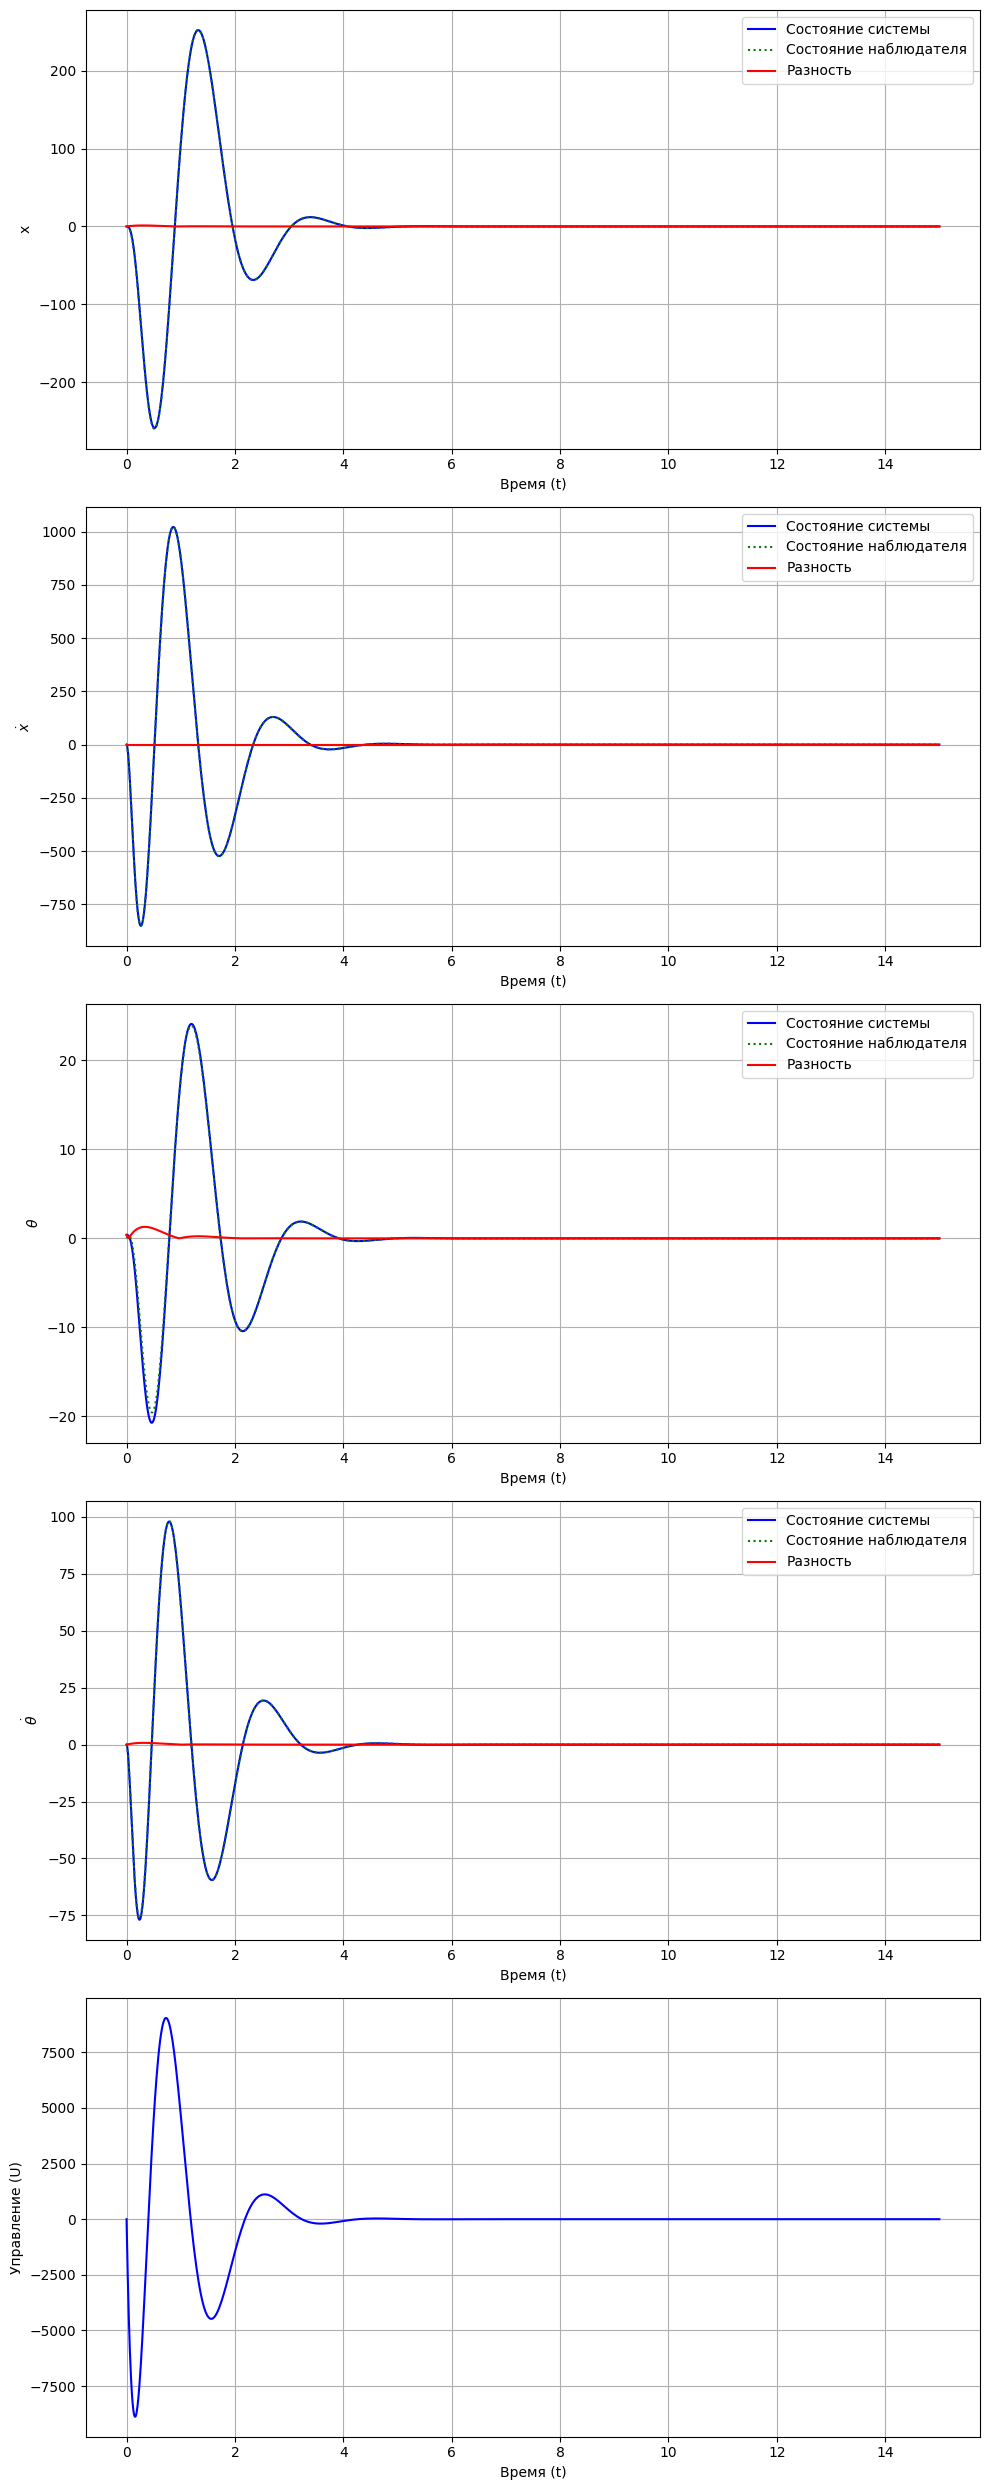

In [28]:
# Линейная система с управлением
# data = plot_time(rhs_linear_controlled)(pnt = INIT_POINT, is_controlled = True)
# fig, axs = data["fig"], data["axs"]

# plt.show()

plot_time_func = plot_time(rhs_linear_controlled)
data = plot_time_func(pnt=INIT_POINT, is_controlled=True)
plt.show()

In [39]:
# Нелинейная система с управлением
plot_time_func = plot_time(rhs_nonlinear_controlled)
data = plot_time_func(pnt=INIT_POINT, is_controlled=True)
plt.show()

KeyboardInterrupt: 

## 8

In [81]:
def control_akkerman(A, B, poly_coef):
    """ Функция поиска собственных чисел по Аккерману
    
    Принимает матрицы A, B и полином желаемых чисел \\
    На выходе получается управление в виде theta
    """
    n = A.shape[0]

    C = np.empty((n, n))
    C[:, 0] = B[:, 0]
    for i in range(1, n):
        C[:, i] = A @ C[:, i - 1]

    var = np.identity(n)
    ch_poly = np.zeros((n, n))
    for c in poly_coef[::-1]:
        ch_poly += var * c
        var = var @ A

    e_n = np.zeros((1, n))
    e_n[0, -1] = 1
 
    theta = np.empty((1, n))
    theta[0, :] = - e_n @ np.linalg.inv(C) @ ch_poly
    return theta

In [ ]:
A = np.array([
    [0, 0,         1,             0],
    [0, 0,         0,             1],
    [0, 0.060985, -7.4894,  -0.0875],
    [0, 1.08167, -0.82153, -1.55195]
])
B= np.array([
    [0],
    [0],
    [0.98343],
    [0.10787]
])
h = 0.05
Ad, Bd = discrete_system_coef(h)
C = np.array([[1.0, 1.0, 0.0, 0.0]])

eigv_sys = np.array(np.linalg.eigvals(Ad), dtype = float)
eigv_obs = eigv_sys.copy()
print('Собственные числа системы и наблюдателя:', list(np.round(eigv_sys, 5)))

Собственные числа системы и наблюдателя: [(1+0j), (1.02639+0j), (0.90215+0j), (0.68719+0j)]


In [ ]:
# Сдвигаем собственные числа
eigv_sys[0:2] = np.exp([(-0.4 + 1j) * h, (-0.4 - 1j) * h])
theta = control_akkerman(Ad, Bd, np.poly(eigv_sys))
print('Управление по состоянию системы: ', np.round(theta, 5))

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

### 8 а

In [57]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-1/2, 1.05348495, 0.81384858, 0.47218647]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[-1.14145860e+02  5.93832467e-04 -1.53304672e+01  8.64891646e-01]]


In [58]:
Ac = A + B @ K
print(Ac)

[[ 5.54831147e-01  2.31015947e-04  1.06011780e-02  3.05307742e-03]
 [-4.56583439e-02  1.00514024e+00 -9.21218687e-03  9.31459567e-02]
 [-7.89889350e+00  3.99109321e-03 -5.87868328e-01  5.44165019e-02]
 [-7.96738101e-01  1.00194145e-01 -1.58373661e-01  8.67416944e-01]]


In [59]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 20, 1000)  # Временной интервал 0-8 секунд
x0 = [0, np.pi/8, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

In [60]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

### 8 б


In [38]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-0.8, -0.4, 0.97961609, 0.92771631]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[   367373.00434479 -14256548.46851508    757744.25866705
   -6909996.28948736]]


In [27]:
S_ = np.array([
    [0.003277, 0.88683929, 0.0017092, 0.46206322],
    [1,     0,      0,     0],
    [0,     1,      0,     0],
    [0,     0,      1,     0]
]) 
S = np.linalg.inv(S_)

print("S:\n", S)

S:
 [[ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 2.16420601 -0.0070921  -1.91930293 -0.00369906]]


In [39]:
# K = np.array([
#     12.8950,
#     -1196.0782,
#     61.1636678,
#     -579.5895
# ])

# K = K.reshape((1, 4))

Ac = A + B @ K
print(Ac)

[[ 1.87950922e+01 -6.90569504e+02  3.67138258e+01 -3.34711645e+02]
 [ 1.94180623e+00 -7.43551146e+01  4.00513336e+00 -3.65139197e+01]
 [ 3.47941226e+03 -1.35024645e+05  7.17757021e+03 -6.54449997e+04]
 [ 3.78659561e+02 -1.46945322e+04  7.81016079e+02 -7.12130286e+03]]


In [40]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 20, 1000)  # Временной интервал 0-8 секунд
x0 = [0, np.pi/8, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

In [45]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 10.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 10, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

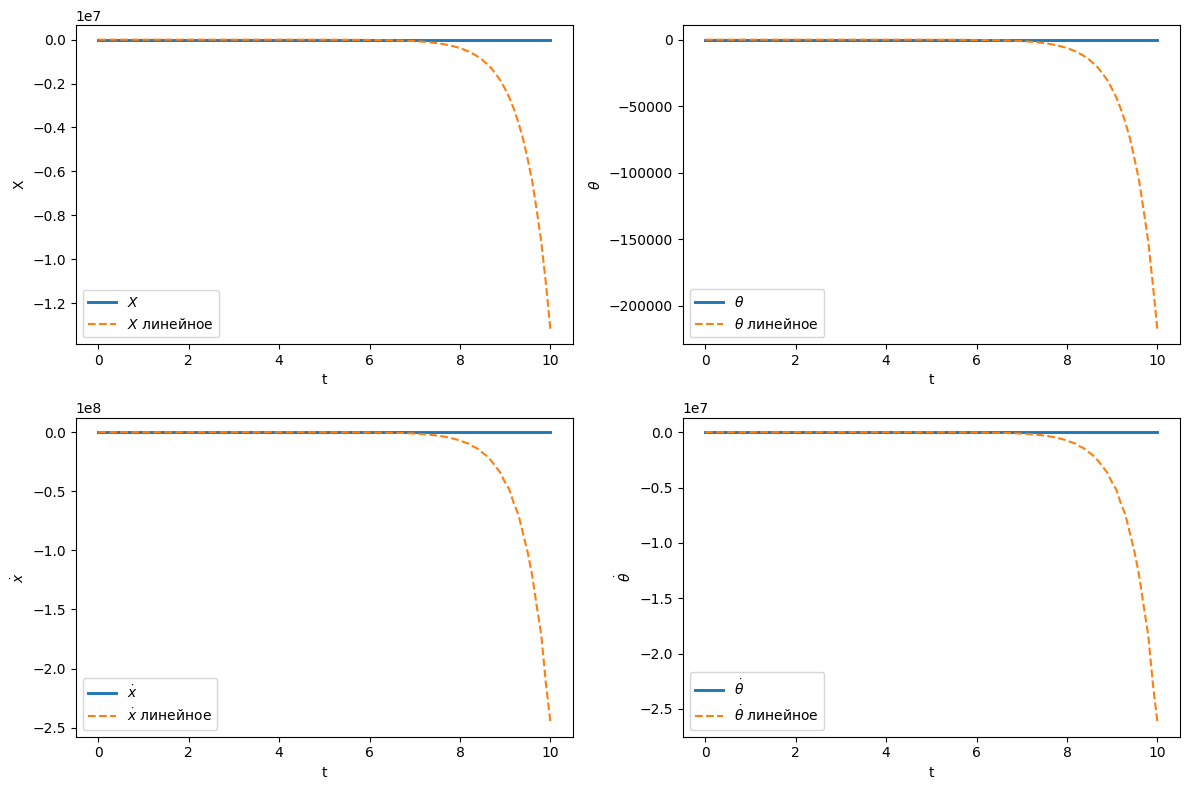

In [46]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], label='$X$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное', linestyle = '--')
#plt.plot(t, x1, label='$x$', color='blue')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[1]/np.pi, label=r'$\theta$ линейное', linestyle = '--')
#plt.plot(t, x2, label=r'$\theta$', color='green')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное', linestyle = '--')
#plt.plot(t, x3, label=r'$\dot{x}$', color='red')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное', linestyle = '--')
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='purple')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

### 8 в


In [ ]:
def ackermann_control(A, B, desired_poles):
    n = len(desired_poles)
    A = A.astype(np.float64)
    B = B.astype(np.float64)
    
    C = np.hstack([np.linalg.matrix_power(A, i) @ B for i in range(n)])
    
    if np.linalg.matrix_rank(C) != n:
        raise ValueError("Система не управляема")
    
    poly_coeffs = np.poly(desired_poles)
    
    phi_A = np.zeros_like(A, dtype=np.float64)
    for power, coeff in enumerate(reversed(poly_coeffs)):
        phi_A += coeff * np.linalg.matrix_power(A, power)
    
    e = np.zeros((1, n), dtype=np.float64)
    e[0, -1] = 1
    
    K = -e @ np.linalg.inv(C) @ phi_A
    return K

desired_poles = [-1/2+1/2j, -1/2-1/2j, 0.81384858, 0.47218647]
K = ackermann_control(A, B, desired_poles)
print("Вектор управления K:", K)

Вектор управления K: [[  144807.29413306 -3433251.50634155   163287.30842687 -1503906.74895725]]


In [81]:
Ac = A + B @ K
print(Ac)

[[ 5.65748447e+02 -1.33896806e+04  6.36890893e+02 -5.86523664e+03]
 [ 5.79229177e+01 -1.37229546e+03  6.53118434e+01 -6.01469900e+02]
 [ 1.00206648e+04 -2.37581000e+05  1.12999547e+04 -1.04070352e+05]
 [ 1.01075491e+03 -2.39639953e+04  1.13969405e+03 -1.04964077e+04]]


In [82]:
def model(x, t, A, B, K):
    u = np.dot(K, x)  # Управление по обратной связи
    dxdt = np.dot(A, x) + np.dot(B, u)
    return dxdt

t = np.linspace(0, 20, 1000)  # Временной интервал 0-8 секунд
x0 = [0, np.pi/8, 0, 0]         # Начальные условия [x1, x2, x3, x4]

solution = odeint(model, x0, t, args=(A, B, K))
x1 = solution[:, 0]  # Позиция (x)
x2 = solution[:, 1]  # Угол (θ)
x3 = solution[:, 2]  # Скорость позиции (ẋ)
x4 = solution[:, 3]  # Угловая скорость (θ̇)

In [83]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        y3,
        y4,
        (m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4,
        (m * l * ((m * y4 * np.cos(y2) - m * y4**2 * np.sin(y2)) / (m + M) + Ac[2][0] * y1 + Ac[2][1] * y2 + Ac[2][2] * y3 + Ac[2][3] * y4) * np.cos(y2) + m * g * l * np.sin(y2)) / (I + m * l**2) +  Ac[3][0] * y1 + Ac[3][1] * y2 + Ac[3][2] * y3 + Ac[3][3] * y4,
    ]

    return dydt


x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0]
x_span = (x0, xT)  # интервал по x

# Временной интервал: от 0 до 8 секунд
t = np.linspace(0, 20, 1000)

# Интегрирование системы
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

C:\Users\serez\AppData\Local\Temp\ipykernel_41972\1357496418.py:19: RuntimeWarning: overflow encountered in scalar multiply
  return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]
C:\Users\serez\AppData\Local\Temp\ipykernel_41972\1357496418.py:19: RuntimeWarning: invalid value encountered in scalar add
  return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]


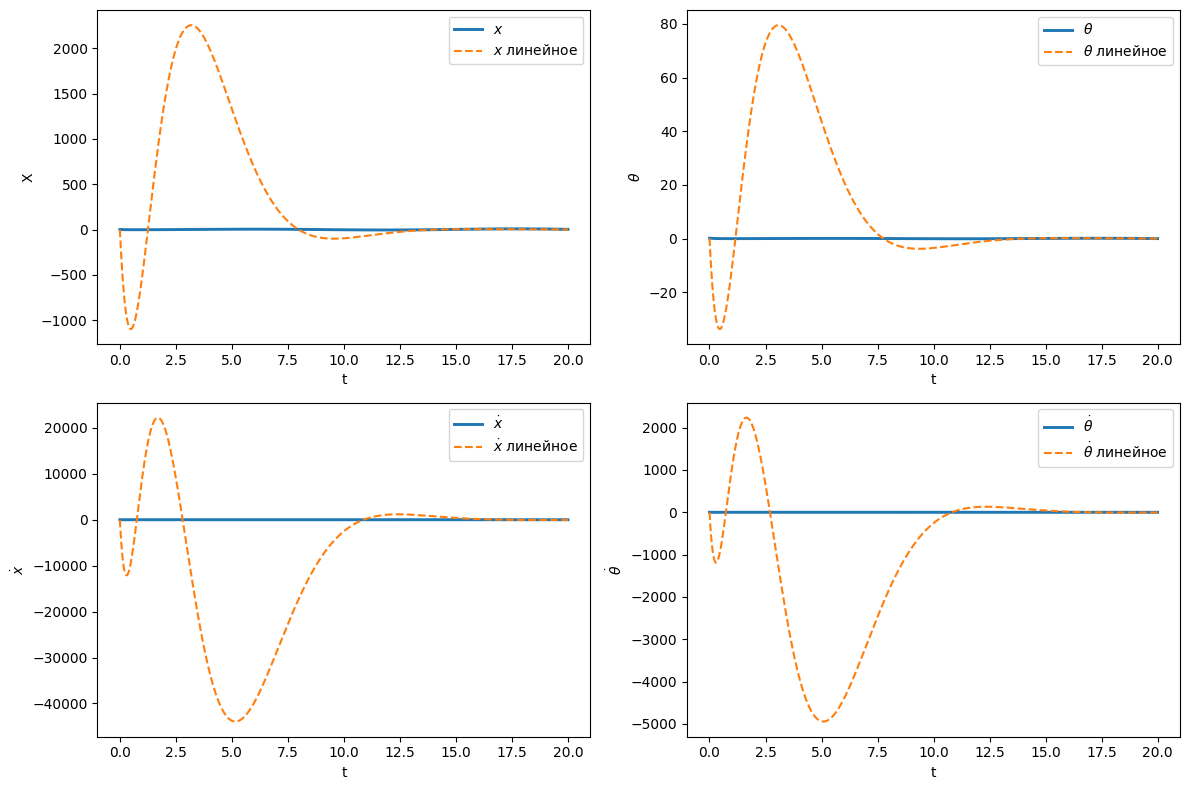

In [84]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
#plt.plot(t, x1, label='$x$', color='blue')
plt.plot(sol.t, sol.y[0], label='$x$', linewidth = 2.1)
plt.plot(t, x1, label='$x$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
#plt.plot(t, x2, label=r'$\theta$', color='blue')
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(t, x2/np.pi, label=r'$\theta$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
#plt.plot(t, x3, label=r'$\dot{x}$', color='blue')
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(t, x3, label=r'$\dot{x}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='blue')
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(t, x4, label=r'$\dot{\theta}$ линейное', linestyle = '--')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

## 9


In [3]:
A = np.array([
    [1,  0.0002287,   0.07039 ,  -0.00032],
    [0,  1.00514 ,  -0.00308,   0.0928 ],
    [0,  0.00395 ,   0.473,  -0.005434],
    [0,  0.10019 ,    -0.051367 ,   0.86138 ]
])
B= np.array([
    [0.0039],
    [0.0004],
    [0.0692],
    [0.00698]
])
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Собственные числа:", eigenvalues)
print("Собственные векторы:\n", eigenvectors)

Собственные числа: [1.         1.05348495 0.81384858 0.47218647]
Собственные векторы:
 [[ 1.          0.003277   -0.00941768  0.13088748]
 [ 0.          0.88683929  0.43662529  0.01768752]
 [ 0.          0.0017092   0.01939843 -0.98211628]
 [ 0.          0.46206322 -0.89938499 -0.13417613]]


In [4]:
P_ = np.array([
    [0.003277, 0.88683929, 0.0017092, 0.46206322],
    [1,     0,      0,     0],
    [0,     1,      0,     0],
    [0,     0,      1,     0]
]) 
P = np.linalg.inv(P_)

print("P:\n", P) 

P:
 [[ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 2.16420601 -0.0070921  -1.91930293 -0.00369906]]


In [5]:
C = np.array([
    [1,     0,      0,     0],
    [0,     1,      0,     0],
]) 

Theta1, Theta2, lambda_ = sp.symbols('Theta1 Theta2 lambda')

L_hat = sp.Matrix([
    [Theta1, Theta2, 0, 0],
    [Theta1, Theta2, 0, 0]
])

term1 = P_ @ A.T @ P

term2 = P_ @ C.T @ L_hat

result = term1 - term2

sp.pprint(result, wrap_line=False)

⎡1.05348495046262 - 0.89011629⋅Θ₁  3.20556985219194e-10 - 0.89011629⋅Θ₂  9.36642301790389e-10  -1.21931071472457e-9⎤
⎢                                                                                                                  ⎥
⎢            -1.0⋅Θ₁                             1.0 - Θ₂                         0                     0          ⎥
⎢                                                                                                                  ⎥
⎢     0.21683180063542 - Θ₁             -Θ₂ - 0.00048185781068227         0.812845039875063    0.00357939108635394 ⎥
⎢                                                                                                                  ⎥
⎣       -0.111168770368695                  0.0707543000604982            0.0955088333839469    0.473190009662314  ⎦


In [19]:
A_hat = sp.Matrix([
    [1.05348495046262 - 0.89011629*Theta1,     -0.89011629*Theta2 + 3.20556985219194e-10],
    [-1.0*Theta1,     1.0 - 1.0*Theta2],
])

char_poly = (A_hat - lambda_ * sp.eye(2)).det()

char_poly_simplified = sp.simplify(char_poly)

print("Характеристический полином:")
sp.pprint(char_poly_simplified, wrap_line=False)

Характеристический полином:
                                                                           2                                        
0.89011629⋅Θ₁⋅λ - 0.890116289679443⋅Θ₁ + 1.0⋅Θ₂⋅λ - 1.05348495046262⋅Θ₂ + λ  - 2.05348495046262⋅λ + 1.05348495046262


### 9 а

In [52]:
eq1 = char_poly.subs(lambda_, np.exp(-1/2)*h)

# Находим производную полинома и подставляем λ = -1
char_poly_derivative = sp.diff(char_poly, lambda_)
eq2 = char_poly_derivative.subs(lambda_, np.exp(-1/2)*h)

# 3. Решаем систему уравнений
solutions = sp.solve([eq1, eq2], [Theta1, Theta2], dict=True)

print("\nНайденные решения:")
for sol in solutions:
    print(f"Θ1 = {sol[Theta1].evalf()}, Θ2 = {sol[Theta2].evalf()}")


Найденные решения:
Θ1 = 23.0442765947852, Θ2 = -18.4707316510156


In [53]:
L_hat = np.array([
    [23.0442765947852, -18.4707316510156, 0, 0],
    [23.0442765947852, -18.4707316510156, 0, 0]
])

L = (L_hat @ P_).T
print("L:\n", L)

L:
 [[-18.39521556 -18.39521556]
 [ 20.43656989  20.43656989]
 [  0.03938728   0.03938728]
 [ 10.64791265  10.64791265]]


In [54]:
Ac = A - L @ C
print(Ac)

[[ 18.39521556  18.39521556   1.           0.        ]
 [-20.43656989 -20.43656989   0.           1.        ]
 [  1.04338972  -0.03938728  -1.551952    -0.821534  ]
 [-10.58686565 -10.64791265  -0.874998    -7.489445  ]]


In [55]:
g = 9.81
Kt = 1.726
Ks = 4.487
Bcq = 5.4
m =  0.56
l =  0.1778
Bp = 1.4
I = 0.89
M = 1.206

A1 = m + M
C1 = m * l
D1 = I + m * l**2
K1 = Kt*Ks + Bcq

def systemLinal(x, Y):
    x, fi, y1, y2 = Y
    tu = 0
    return [Ac[0][0] * x + Ac[0][1] * fi + y1, Ac[1][0] * x + Ac[1][1] * fi + y2, Ac[2][0] * x + Ac[2][1]*fi + Ac[2][2] * y1 + Ac[2][3] * y2, Ac[3][0] * x + Ac[3][1] *  fi + Ac[3][2] * y1 + Ac[3][3] * y2]

def system(x, Y):
    y1, y2, y3, y4 = Y

    #u = u1 * y1 + u2 * y2 + u3 * y3 + u4 * y4
    f1 = -K1*y3 - C1 * y4**2 * np.sin(y2)
    f2 = -Bp*y4 + C1 * g * np.sin(y2)

    dydt = [
        -L[0][0] * y1 + -L[0][1] * y2 + y3,
        -L[1][0] * y1 + -L[1][1] * y2 + y4,
        (f1*D1 + f2 * C1 * np.cos(y2))/(A1*D1-(C1*np.cos(y2))**2) + -L[2][0] * y1 + -L[2][1] * y2,
        (f1 * C1 * np.cos(y2) + f2 * A1)/(A1*D1 - (C1*np.cos(y2))**2) + -L[3][0] * y1 + -L[3][1] * y2,
    ]

    return dydt


# Начальные условия
x0 = 0.0
xT = 20.0
y0 = [0.0, np.pi/8, 0.0, 0.0] 
x_span = (x0, xT)  # интервал по x

# Решаем систему
sol = solve_ivp(system, x_span, y0, t_eval=np.linspace(x0, xT, 100))
solLineal = solve_ivp(systemLinal, x_span, y0, t_eval=np.linspace(x0, xT, 100))

U = 7.0 * sol.y[0] + 92 * sol.y[1] + 52 * sol.y[2] - 8.0 * sol.y[3]
U_lin = 7.0 * solLineal.y[0] + 92 * solLineal.y[1] + 52 * solLineal.y[2] - 8.0 * solLineal.y[3]

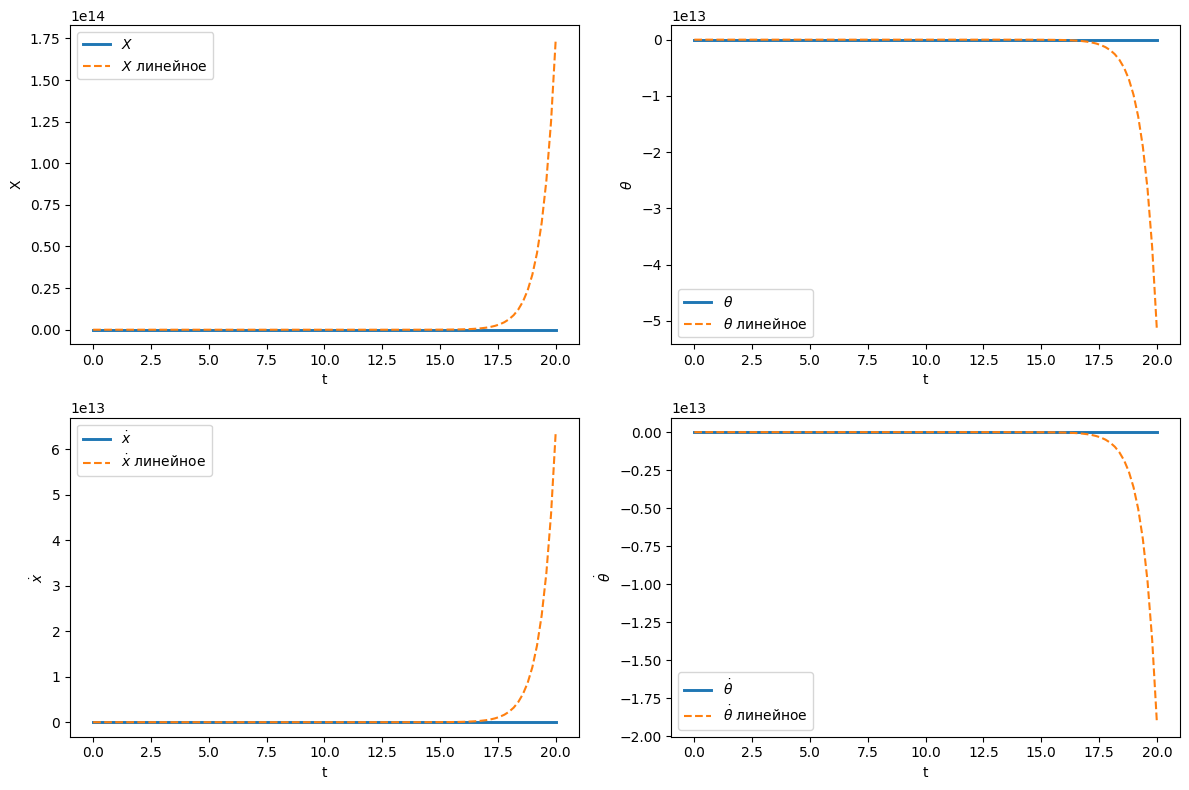

In [56]:
plt.figure(figsize=(12, 8))

# График x1 (позиция)
plt.subplot(2, 2, 1)
plt.plot(sol.t, sol.y[0], label='$X$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[0], label='$X$ линейное', linestyle = '--')
#plt.plot(t, x1, label='$x$', color='blue')
plt.xlabel('t')
plt.ylabel('X')
plt.grid(False)
plt.legend()

# График x2 (угол)
plt.subplot(2, 2, 2)
plt.plot(sol.t, sol.y[1]/np.pi, label=r'$\theta$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[1]/np.pi, label=r'$\theta$ линейное', linestyle = '--')
#plt.plot(t, x2, label=r'$\theta$', color='green')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.grid(False)
plt.legend()

# График x3 (скорость позиции)
plt.subplot(2, 2, 3)
plt.plot(sol.t, sol.y[2], label=r'$\dot{x}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[2], label=r'$\dot{x}$ линейное', linestyle = '--')
#plt.plot(t, x3, label=r'$\dot{x}$', color='red')
plt.xlabel('t')
plt.ylabel(r'$\dot{x}$')
plt.grid(False)
plt.legend()

# График x4 (угловая скорость)
plt.subplot(2, 2, 4)
plt.plot(sol.t, sol.y[3], label=r'$\dot{\theta}$', linewidth = 2.1)
plt.plot(solLineal.t, solLineal.y[3], label=r'$\dot{\theta}$ линейное', linestyle = '--')
#plt.plot(t, x4, label=r'$\dot{\theta}$', color='purple')
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()